# Machine Learnig Project
## Heart Disease Classification
**Student**: Luigi Della Cioppa, matr. 502298

## Problem Description

Every day, the average human heart beats around 100,000 times, pumping 2,000 gallons of blood through the body. Inside out body there are 60,000 miles of blood vessels.

Heart disease is inflammation or damage to the heart and blood vessels over time. the disease can affect anyone of any age, gender, or social status.
Heart disease remains the No. 1 cause of death in the United States, according to 2019 data. CHD accounted for approximately 12.6% of deaths in the United States in 2018,causing 360,900 deaths.

After many studies trying to overcome and learn about heart disease, in the end, this disease can be detected using machine learning systems.

![](imgs/heart.png)


## Dataset description

The data set is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

### Column Descriptions:

1. **id** (Unique id for each patient)
2. **age** (Age of the patient in years)
3. **dataset** (place of study)
4. **sex** (Male/Female)
5. **cp** chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. **trestbps** resting blood pressure (resting blood pressure (in mm Hg on admission to thve hospital))
7. **chol** (serum cholesterol in mg/dl)
8. **fbs** (if fasting blood sugar > 120 mg/dl)
9. **restecg** (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
10. **thalach**: maximum heart rate achieved
11. **exang**: exercise-induced angina (True/ False)
12. **oldpeak**: ST depression induced by exercise relative to rest
13. **slope**: the slope of the peak exercise ST segment
14. **ca**: number of major vessels (0-3) colored by fluoroscopy
15. **thal**: [normal; fixed defect; reversible defect]
16. **num**: the predicted attribute [0=no heart disease; 1,2,3,4 = stages of heart disease]

In this project we introduce a general structure for design a ML-oriented project using different classifiers and approaches. In short, we will develop the flow depicted in the figure.

![](imgs/ml_project_flow.png)

In [1]:
!pip3 install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import warnings

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate,RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer

from feature_engine.selection import DropFeatures

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as IMBPipeline
import sys
import os

warnings.filterwarnings('ignore')
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

# Load Heart Disease dataset
Here we load the dataset, inspect all its characteristics and prepare data for modeling

In [3]:
heart_dataset = pd.read_csv('dataset/heart_disease_uci.csv')

## Rename the class label num to class and display the first rows
We rename the class column to explict the target and display the first rows

In [4]:
heart_dataset.rename(columns={'num': 'target'}, inplace=True)
heart_dataset.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  target  
0       fixed defect       0  
1             normal       2  
2  reversable defect       1  
3             normal       0  
4             normal       0

## Display columns info
We display the columns info to check the datatype of each column

In [5]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  target    920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


## Separate numeric and categorical variables
Firstly, we change the datatype of age form int to float and the datatype of fbs and exang from object to int

In [6]:
heart_dataset['age'] = heart_dataset['age'].astype('float64')
heart_dataset['fbs'] = (heart_dataset['fbs'] == True).astype('int64')
heart_dataset['exang'] = (heart_dataset['exang'] == True).astype('int64')

Then, we change the object datatype to category and check the type of the column after the change

In [7]:
heart_dataset[heart_dataset.select_dtypes(['object']).columns] = heart_dataset.select_dtypes(['object']).apply(lambda x: x.astype('category'))
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        920 non-null    int64   
 1   age       920 non-null    float64 
 2   sex       920 non-null    category
 3   dataset   920 non-null    category
 4   cp        920 non-null    category
 5   trestbps  861 non-null    float64 
 6   chol      890 non-null    float64 
 7   fbs       920 non-null    int64   
 8   restecg   918 non-null    category
 9   thalch    865 non-null    float64 
 10  exang     920 non-null    int64   
 11  oldpeak   858 non-null    float64 
 12  slope     611 non-null    category
 13  ca        309 non-null    float64 
 14  thal      434 non-null    category
 15  target    920 non-null    int64   
dtypes: category(6), float64(6), int64(4)
memory usage: 78.3 KB


## Check for missing values and compute their percentage
We check the dataset for missing values and computer their percentage with reference to each feature

In [8]:
heart_dataset.isnull().mean()

id          0.000000
age         0.000000
sex         0.000000
dataset     0.000000
cp          0.000000
trestbps    0.064130
chol        0.032609
fbs         0.000000
restecg     0.002174
thalch      0.059783
exang       0.000000
oldpeak     0.067391
slope       0.335870
ca          0.664130
thal        0.528261
target      0.000000
dtype: float64

We also plot where the missing values are located in the feature matrix to get an intuitive visualization of them

<AxesSubplot: >

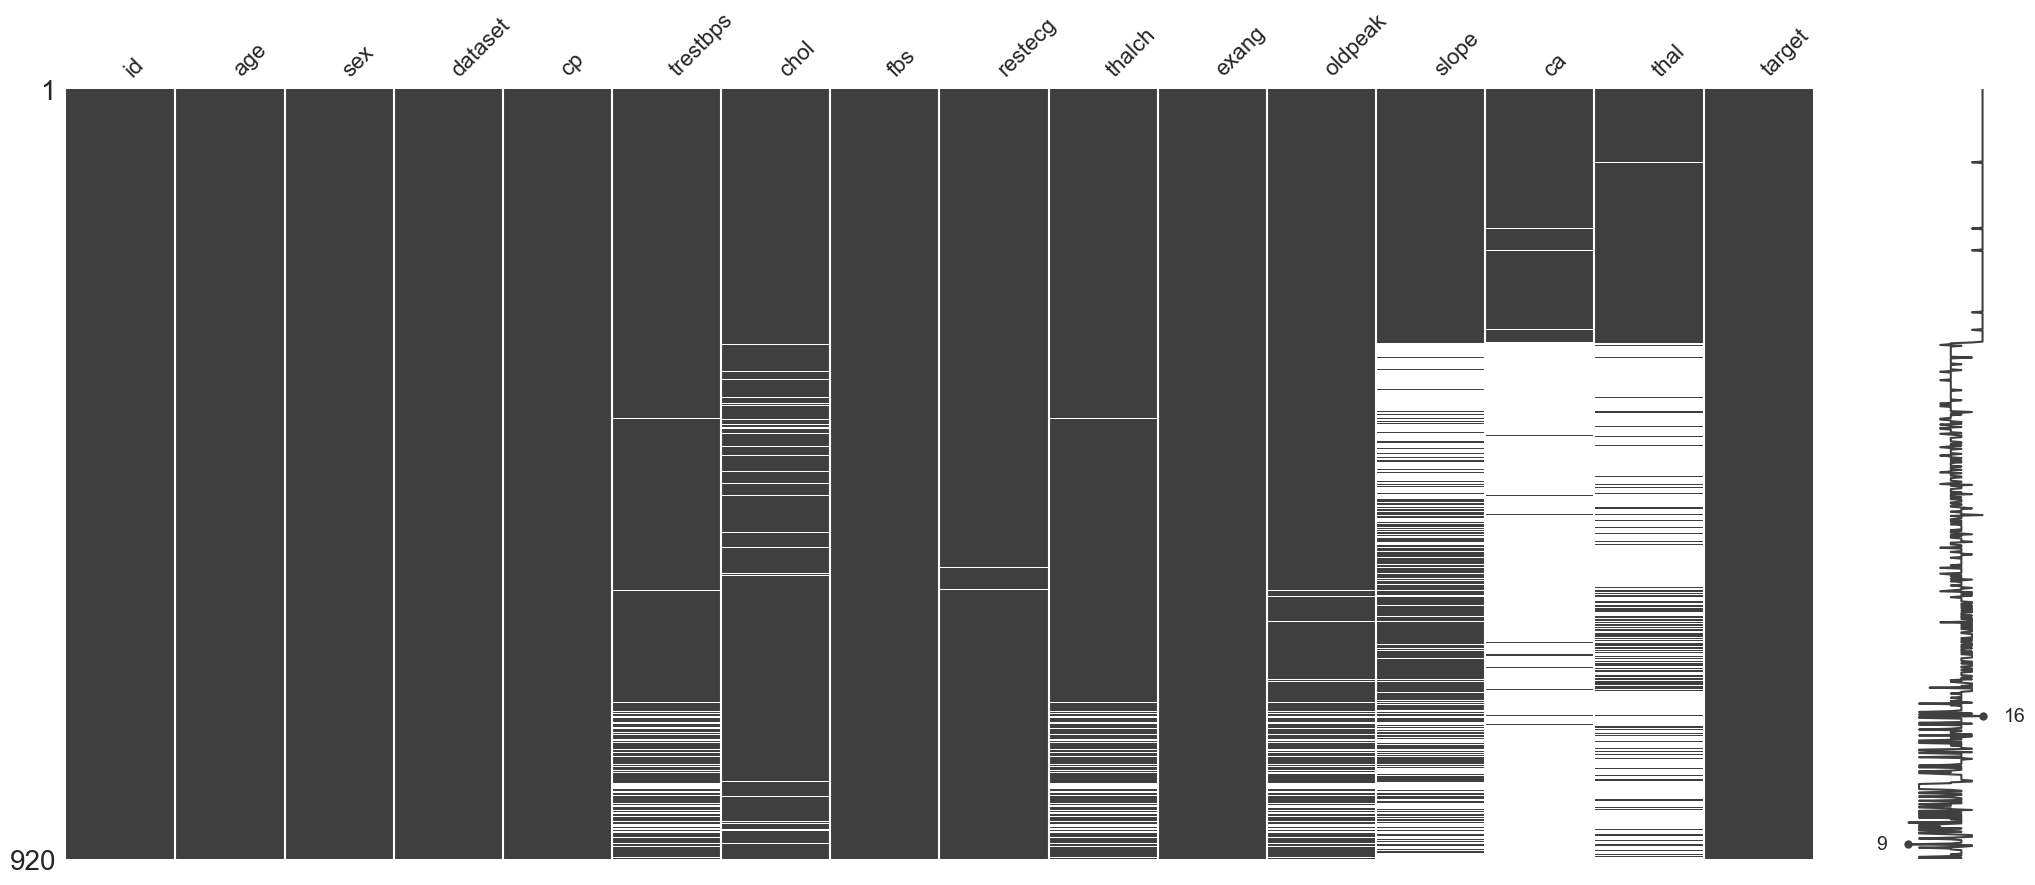

In [9]:
msno.matrix(heart_dataset)

## Check if the classes are balanced
We also have to check if the classes are balanced by computing their percentage and plot the number of items for each class

0    0.446739
1    0.288043
2    0.118478
3    0.116304
4    0.030435
Name: target, dtype: float64


<AxesSubplot: xlabel='target', ylabel='count'>

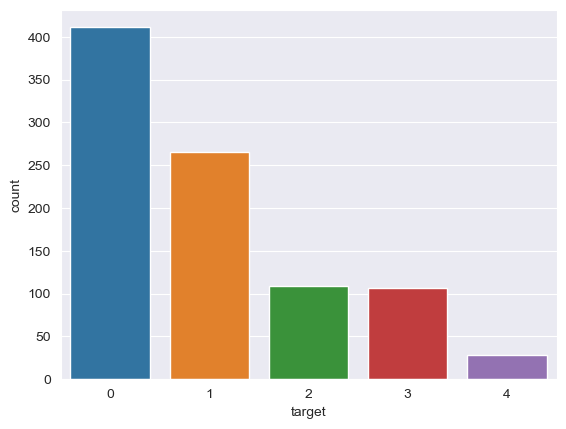

In [10]:
print(heart_dataset.target.value_counts()/heart_dataset.shape[0])
sns.countplot(x=heart_dataset['target'])

As it is evident form the above plot, we have to deal with an unbalanced dataset. In fact, class 2 and 3 sare about 11% and class 4 is about 3% of the whole dataset.

## Display descriptive statistics
We display the descriptive statistics of the whole dataset to get information on how the features are distributed and plot their histograms

In [11]:
heart_dataset.describe()

id         age    trestbps        chol         fbs      thalch  \
count  920.000000  920.000000  861.000000  890.000000  920.000000  865.000000   
mean   460.500000   53.510870  132.132404  199.130337    0.150000  137.545665   
std    265.725422    9.424685   19.066070  110.780810    0.357266   25.926276   
min      1.000000   28.000000    0.000000    0.000000    0.000000   60.000000   
25%    230.750000   47.000000  120.000000  175.000000    0.000000  120.000000   
50%    460.500000   54.000000  130.000000  223.000000    0.000000  140.000000   
75%    690.250000   60.000000  140.000000  268.000000    0.000000  157.000000   
max    920.000000   77.000000  200.000000  603.000000    1.000000  202.000000   

            exang     oldpeak          ca      target  
count  920.000000  858.000000  309.000000  920.000000  
mean     0.366304    0.878788    0.676375    0.995652  
std      0.482056    1.091226    0.935653    1.142693  
min      0.000000   -2.600000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.500000    0.000000    1.000000  
75%      1.000000    1.500000    1.000000    2.000000  
max      1.000000    6.200000    3.000000    4.000000

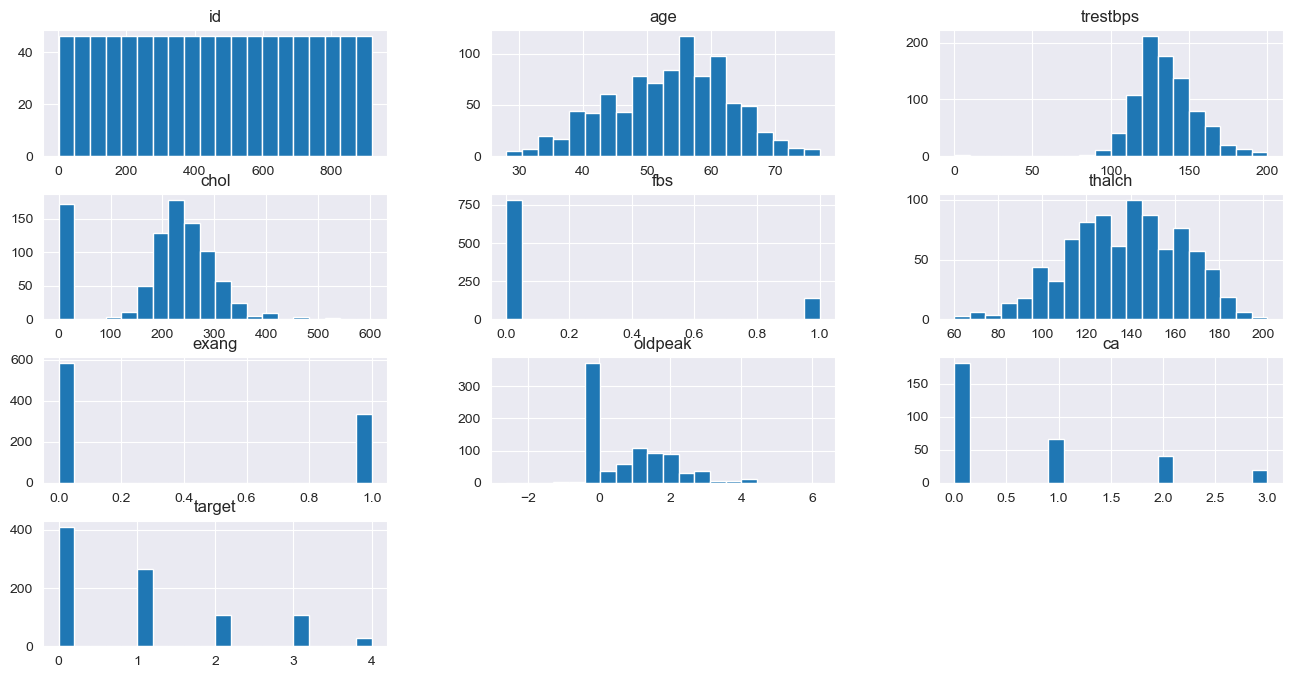

In [12]:
histograms = heart_dataset.hist(figsize=(16,8), bins=20)

## Display correlation matrix and display the heatmap
Finally, we compute the features' correlation matrix in order to have information about pairwise correlation of all features and display the heatmap. It allows us to visualize how much (or how little) correlation exists between different features. This is an important step in pre-processing machine learning pipelines. Since the correlation matrix allows us to identify features that have high degrees of correlation, they allow us to reduce the number of features we may have in a dataset.
In particular, these relationships help us realize the relevance of attributes with respect to the target class to be predicted. Hence, we could exploit correlation analysis and machine learning-based approaches to identify relevant attributes in the dataset which have a significant impact on classifying a sample.

A negative coefficient will tell us that the relationship is negative, meaning that as one value increases, the other decreases. Similarly, a positive coefficient indicates that as one value increases, so does the other. For any non-numeric data type columns in the dataset it is ignored.

To proceed with the correlation analysis, firstly we drop all the irrelevant and  features.

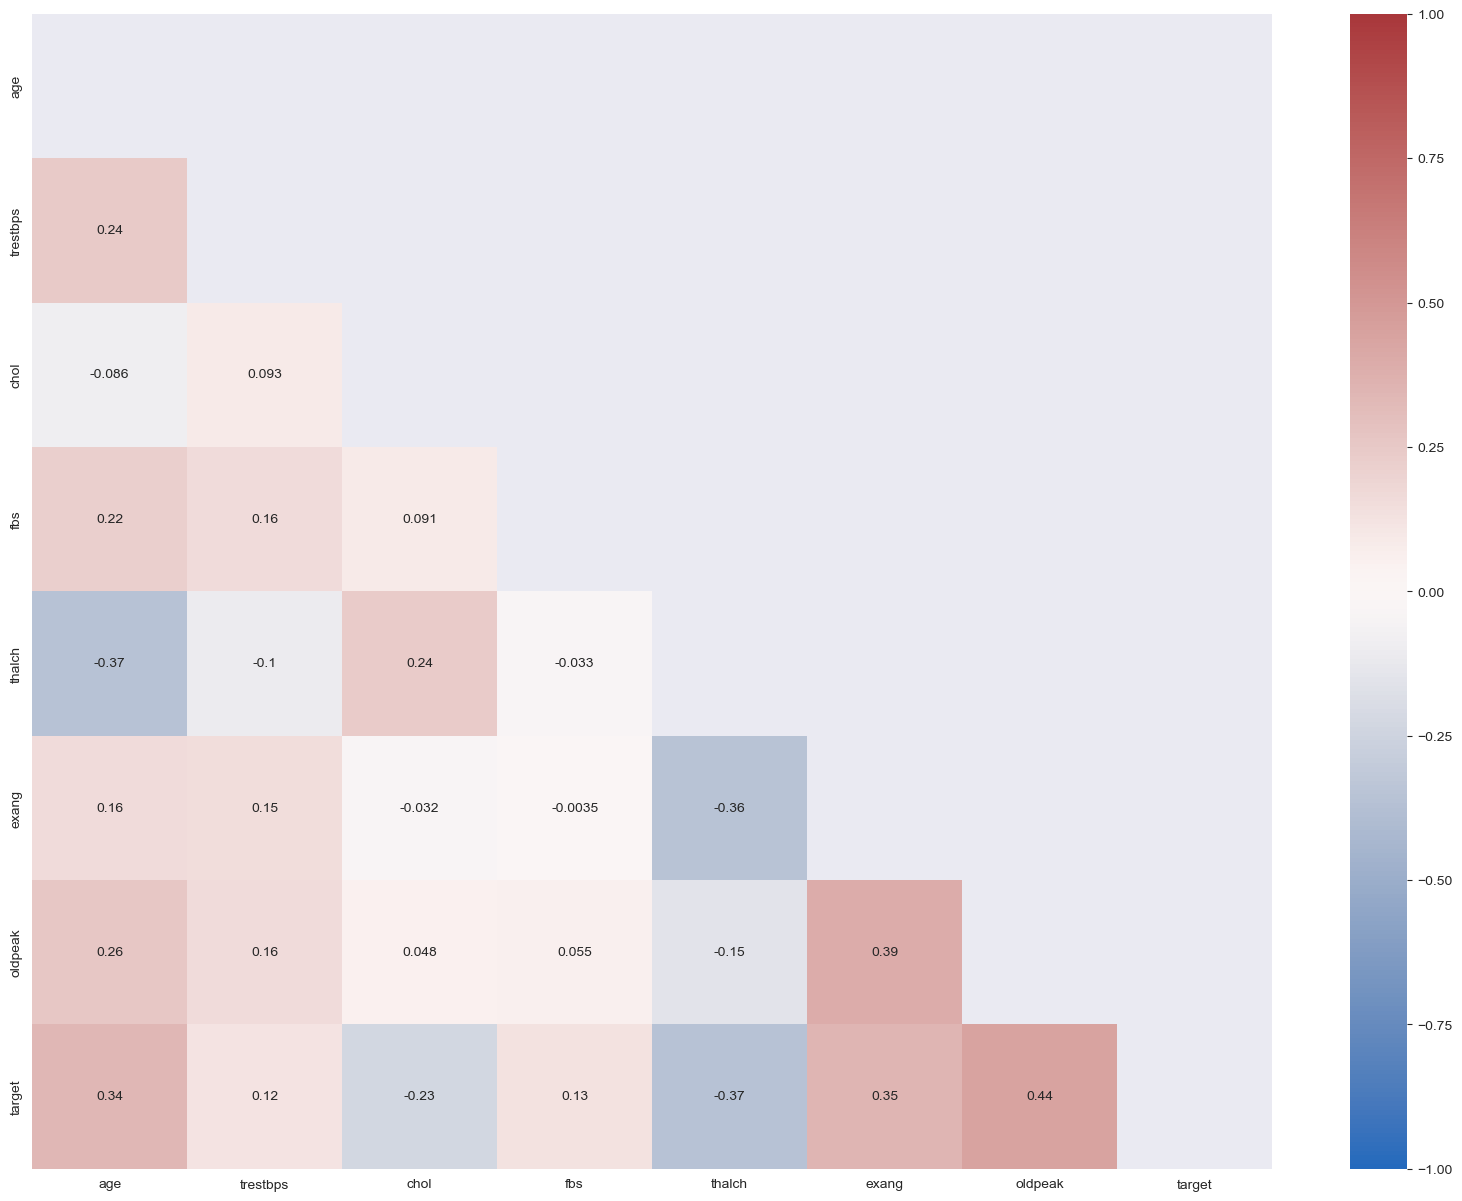

In [13]:
# List of the columns to drop
features_to_drop = ['id', 'dataset', 'ca', 'thal', 'slope']
hd = heart_dataset.drop(features_to_drop, axis=1)

# Display correlation matrix and heatmap
correlation_matrix = hd.corr()
#print(correlation_matrix)
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
p=sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, mask=mask, center=0, cmap='vlag')
plt.show()

From the corrlation matrix we can see that all the features have a small correlation with the class. Hence, we cannot drop any of them on this basis.

## Preparing data for modeling
After the analysis of the dataset, we have to drop the columns:

- **id**: not relevant;
- **dataset**: not relevant;
- **ca**: too many missing values;
- **thal**: too many missing values;
- **slope**: too many missing values.

To this end, we can act on feature removal when we will define a <code>ColumnTransformer</code>.

Firstly, we separate the dataset into features and class

In [14]:
y = heart_dataset['target']
X = heart_dataset.drop(['target'], axis=1)

### Train-test split
Then, we split the entire dataset into training and test sets, putting **20%** of the instances in the test set.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, shuffle=True, stratify=y, random_state=42)

## Define F1 score for multiclass classification
Given that the dataset is a multiclass dataset, to measure a classifier performace we define a function that uses as score the f1_score with the parameter *average* required for multiclass/multilabel targets.
Its value is set to 'weighted' in order to compute metrics for each label, and find their average weighted by support (the number of true instances for each label) to account for label imbalance.
Then, we use *make_scorer* to make a scorer from a performance metric or loss function. It takes a score function and returns a callable that scores an estimator’s output.

In [16]:
# F1 function for multiclass
def f1_score_weighted(y, y_hat):
	score = f1_score(y, y_hat, average='weighted')
	return score

f1_weighted = make_scorer(f1_score_weighted, greater_is_better=True)

## Definition of the Data Transformation Pipeline

Here we define the dataset ColumnTransformer pipeline. It consists of 3 steps in which features are transformed depending on their datatype:
1. **num**: apply a KNN imputer with 5 nearest neighbours and a standard scaler to numeric features
2. **bin**: apply SimpleImputer with a *most frequent* strategy and ordinal encoder to boolean features (encoded as int)
3. **cat**: apply SimpleImputer with a *most frequent* strategy and a OneHot encoder to categorical features (here we hava no hierarchy)

In [17]:
# Define the columns transformer
transformer = ColumnTransformer([
	# Step 1: apply steps for numerical features
	('num', make_pipeline(
		#SimpleImputer(missing_values=np.nan, strategy='median'),
		KNNImputer(n_neighbors=5),
		StandardScaler()),
	 make_column_selector(dtype_include='float64')
	 ),
	# Step 2: apply steps for binary features
	('bin', make_pipeline(
		SimpleImputer(strategy='most_frequent'),
		OrdinalEncoder(categories='auto')),
	 make_column_selector(dtype_include='int64')
	 ),
	# Step 3: apply steps for categorical features
	('cat', make_pipeline(
		SimpleImputer(strategy='most_frequent'),
		#OrdinalEncoder(categories='auto')),
		OneHotEncoder(categories='auto', drop='first', handle_unknown='ignore')),
	 make_column_selector(dtype_include='category')
	 )],
	remainder='passthrough',
	verbose_feature_names_out=True,
	sparse_threshold=0
)
transformer

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('num',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9bd37c5fd0>),
                                ('bin',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253cd0>),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253c10>)])

# Definition of the classifiers pipelines
Now, we define the pipelines for the following classifiers:

1. **Logistic Regressor**,
2. **Decision Tree**,
3. **KNN Classifier**,
4. **Random Forest**.

Each pipeline is composed by 5 steps:

1. Drop irrelevant features,
2. Transform all the features,
3. SMOTE sampling (if uncommented),
4. PCA dimensionality reduction (default),
5. Classification.

Please note that we have not used **SMOTE** in that it simply duplicates examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

## Logistic Regression pipeline
Before using all the classifiers above, we try the classification by using only LR

In [18]:
# Logistic Regression pipeline
lr_pipeline = IMBPipeline(steps=[
	# Step 1: Drop irrelevant features
	('drop_columns', DropFeatures(features_to_drop)),
	# Step 2: Transform all the features
	('transformer', transformer),
	# Step 3: Sampling
	#('sampler', SMOTE()),
	# Step 4:  Dim reduction
	('dim_reduction', PCA()),
	# Step 5:  Logistic Regression
	('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])

lr_pipeline

Pipeline(steps=[('drop_columns',
                 DropFeatures(features_to_drop=['id', 'dataset', 'ca', 'thal',
                                                'slope'])),
                ('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253cd0>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253c10>)])),
                ('dim_reduction', PCA()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=42))])

### Let's try a Logistic Regression classification with default hyperparameters' values
Here we perform the training with LR using defaults values for the hyperparameters and the whole train set. Then, we perform the classification of the test set and compute the scores

In [19]:
# LR training
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('drop_columns',
                 DropFeatures(features_to_drop=['id', 'dataset', 'ca', 'thal',
                                                'slope'])),
                ('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253cd0>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253c10>)])),
                ('dim_reduction', PCA()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=42))])

Compute the scores on the train and test set and display the confusion matrix on the test.

F1 on training set:0.5467972516127695, F1 on test set:0.5081494420064573
              precision    recall  f1-score   support

           0       0.87      0.73      0.79        82
           1       0.45      0.34      0.39        53
           2       0.25      0.23      0.24        22
           3       0.04      0.05      0.04        21
           4       0.17      0.83      0.28         6

    accuracy                           0.48       184
   macro avg       0.36      0.44      0.35       184
weighted avg       0.56      0.48      0.51       184

[[60 10  1  6  5]
 [ 8 18  8 11  8]
 [ 0  5  5  7  5]
 [ 1  7  5  1  7]
 [ 0  0  1  0  5]]


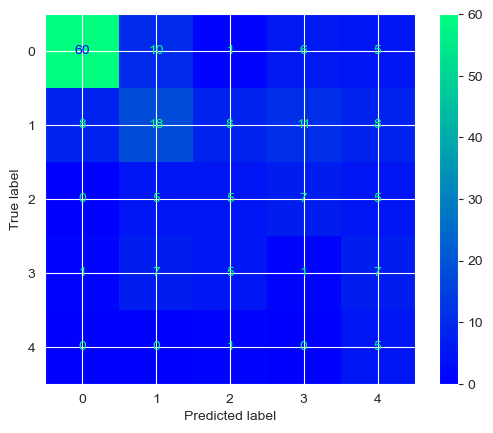

In [20]:
# LR prediction
y_train_predicted = lr_pipeline.predict(X_train)
y_test_predicted = lr_pipeline.predict(X_test)

# Display the report and the F1 score
f1_train = f1_score_weighted(y_train, y_train_predicted)
f1_test = f1_score_weighted(y_test, y_test_predicted)
print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')
conf_matrix = confusion_matrix(y_test, y_test_predicted)
print(classification_report(y_test, y_test_predicted))
print(conf_matrix)
p = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
p.plot(cmap='winter')

Since we got bad results, let's perform the Cross Validation and evaluate the best classifier on the test set.

Average score: 0.5026823737625131 +/- 0.019404829268560377, Max score: 0.5284552845528455, Min score: 0.4816326530612245
F1 on test set: 0.5064665597864179
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        82
           1       0.42      0.32      0.37        53
           2       0.20      0.14      0.16        22
           3       0.17      0.24      0.20        21
           4       0.16      0.83      0.27         6

    accuracy                           0.48       184
   macro avg       0.36      0.45      0.36       184
weighted avg       0.56      0.48      0.51       184

[[59 11  1  6  5]
 [ 8 17  8 10 10]
 [ 0  6  3  9  4]
 [ 1  6  2  5  7]
 [ 0  0  1  0  5]]


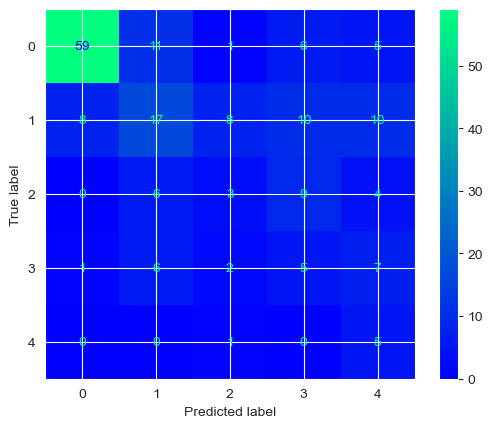

In [21]:
# Applying the cross validation, display the scores on training
scores = cross_validate(lr_pipeline, X_train, y_train, cv=3, return_estimator=True, n_jobs=-1)
print(f"Average score: {scores['test_score'].mean()} +/- {scores['test_score'].std()}, Max score: {scores['test_score'].max()}, Min score: {scores['test_score'].min()}")

# evaluate the best classifier on the test set
best_score_id = np.argmax(scores['test_score'])
y_test_predicted = scores['estimator'][best_score_id].predict(X_test)
f1_test = f1_score_weighted(y_test, y_test_predicted)
print(f'F1 on test set: {f1_test}')
conf_matrix = confusion_matrix(y_test, y_test_predicted)
print(classification_report(y_test, y_test_predicted))
print(conf_matrix)
p = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
p.plot(cmap='winter')

The above results show that *LR* exhibits very poor performance with default hyperparameters' values both using the whole train set and cross validation for the training.

### Define the set of hyperparameters for the Logistic Regression and perform a Grid Search
First of all, we set a list of seeds to initialize the random state of the classifier. Then, we define the hyperparameter combinations

In [22]:
# Seeds for random generator
cl_seeds = [42] #, 123, 643, 91, 3365]
# uncomment the above line if you want to try more different random generator initializations

In [23]:
# Define all the possible hyperparameter combinations
lr_param_grid = {
	'classifier__random_state': cl_seeds,
	'classifier__penalty': ('l2', 'l1'),
	'classifier__class_weight': ['balanced'],
	'classifier__solver': ['newton-cg'],
	'classifier__max_iter': (20, 50, 100, 200),
	'dim_reduction': [LDA(), PCA()],
	'dim_reduction__n_components': [2, 4, 6, 8]}

### Perform a Grid Search over the hyper-parameter space with Logistic Regression

In [24]:
# Perform GridSearch
grid = GridSearchCV(lr_pipeline, lr_param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
scores = cross_validate(grid, X_train, y_train, scoring='f1_weighted', cv=3, return_estimator=True, verbose=3)
for index, estimator in enumerate(scores['estimator']):
	print(estimator.best_estimator_.get_params()['dim_reduction'])
	print(estimator.best_estimator_.get_params()['classifier'],estimator.best_estimator_.get_params()['classifier'].get_params())
	print(scores['test_score'][index])
	print('-'*10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ......................................., score=0.517 total time=   1.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ......................................., score=0.528 total time=   0.7s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] END ......................................., score=0.505 total time=   0.7s
PCA(n_components=8)
LogisticRegression(class_weight='balanced', max_iter=20, random_state=42,
                   solver='newton-cg') {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 20, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
0.5166161202746569
----------
LinearDiscriminantAnalysis(n_components=2)
LogisticRegression(class_weight='balanced', max_iter=20, random_state=42,
                   solver='newton-cg') {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 20, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
0.5278274549370895
----------
Li

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s finished


Let's evaluate the performance of best model

F1 on training set:0.5412869456552052, F1 on test set:0.5322871218516589
F1 on training set:0.537637983977504, F1 on test set:0.514444401253906
F1 on training set:0.537637983977504, F1 on test set:0.514444401253906
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        82
           1       0.50      0.34      0.40        53
           2       0.24      0.18      0.21        22
           3       0.21      0.29      0.24        21
           4       0.15      0.67      0.24         6

    accuracy                           0.52       184
   macro avg       0.39      0.45      0.38       184
weighted avg       0.57      0.52      0.53       184

[[63  7  2  5  5]
 [ 9 18  9 10  7]
 [ 1  5  4  6  6]
 [ 2  6  2  6  5]
 [ 1  0  0  1  4]]


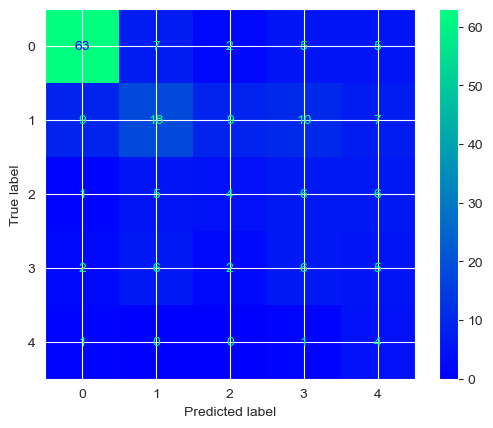

In [25]:
# Display performance of on train and test set
best_estimator = None
best_f1_train = 0.0

for estimator in scores['estimator']:
	estimator.best_estimator_.fit(X_train, y_train)
	y_train_predicted = estimator.best_estimator_.predict(X_train)
	y_test_predicted = estimator.best_estimator_.predict(X_test)
	f1_train = f1_score_weighted(y_train, y_train_predicted)
	f1_test = f1_score_weighted(y_test, y_test_predicted)
	print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')
	if f1_train > best_f1_train:
		best_estimator = estimator.best_estimator_
		best_f1_train = f1_train

y_test_predicted = best_estimator.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_predicted)
print(classification_report(y_test, y_test_predicted))
print(conf_matrix)
p = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
p.plot(cmap='winter')

From the results, we see that the performance of LR is very low. This is mainly due to the unbalancing of the dataset. In fact, it is evident from the scores returned and also from the confusion matrix returned on the test set.
So, let's try to use more classifiers and hyperparameters' tuning.

## Let's try different classifiers: Decision Tree, Knn, Random Forest

### Decision Tree pipeline

In [26]:
# DecisionTree pipeline
dt_pipeline = IMBPipeline(steps=[
	# Step 1: Drop irrelevant features
	('drop_columns', DropFeatures(features_to_drop)),
	# Step 2: Transform all the features
	('transformer', transformer),
	# Step 3: Sampling
	#('sampler', SMOTE()),
	# Step 4:  Dim reduction
	('dim_reduction', PCA()),
	# Step 5:  Logistic Regression
	('classifier',  DecisionTreeClassifier())
])

dt_pipeline

Pipeline(steps=[('drop_columns',
                 DropFeatures(features_to_drop=['id', 'dataset', 'ca', 'thal',
                                                'slope'])),
                ('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253cd0>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253c10>)])),
                ('dim_reduction', PCA()),
                ('classifier', DecisionTreeClassifier())])

### KNN pipeline

In [27]:
# KNN pipeline
knn_pipeline = IMBPipeline(steps=[
	# Step 1: Drop irrelevant features
	('drop_columns', DropFeatures(features_to_drop)),
	# Step 2: Transform all the features
	('transformer', transformer),
	# Step 3: Sampling
	#('sampler', SMOTE()),
	# Step 4:  Dim reduction
	('dim_reduction', PCA()),
	# Step 5:  Logistic Regression
	('classifier',  KNeighborsClassifier())
])

knn_pipeline

Pipeline(steps=[('drop_columns',
                 DropFeatures(features_to_drop=['id', 'dataset', 'ca', 'thal',
                                                'slope'])),
                ('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253cd0>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253c10>)])),
                ('dim_reduction', PCA()),
                ('classifier', KNeighborsClassifier())])

### Random Forest pipeline

In [28]:
# RandomForest pipeline
rf_pipeline = IMBPipeline(steps=[
	# Step 1: Drop irrelevant features
	('drop_columns', DropFeatures(features_to_drop)),
	# Step 2: Transform all the features
	('transformer', transformer),
	# Step 3: Sampling
	#('sampler', SMOTE()),
	# Step 4:  Dim reduction
	('dim_reduction', PCA()),
	# Step 5:  Logistic Regression
	('classifier',  RandomForestClassifier())
])

rf_pipeline

Pipeline(steps=[('drop_columns',
                 DropFeatures(features_to_drop=['id', 'dataset', 'ca', 'thal',
                                                'slope'])),
                ('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253cd0>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253c10>)])),
                ('dim_reduction', PCA()),
                ('classifier', RandomForestClassifier())])

## Grid search
Firstly, we will use a Grid Search approach with all the pipelines to get the best classifier along with its hyper-parameters.

### Grid search hyper-parameters tuning
For each classifier we define the values of the hyper-parameters to try.

In [29]:
# Define all the possible hyperparameter combinations
dt_param_grid = {
	'classifier__random_state': cl_seeds,
	'classifier__criterion': ('gini', 'entropy', 'log_loss'),
	'classifier__max_depth': (5, 10, 15, 20),
	'dim_reduction': [LDA(), PCA()],
	'dim_reduction__n_components': [2, 4, 6, 8]}

rf_param_grid = {
	'classifier__random_state': cl_seeds,
	'classifier__n_estimators': [10, 20, 50, 100],
	'classifier__max_depth': [None, 2, 5, 10],
	'dim_reduction': [LDA(), PCA()],
	'dim_reduction__n_components': [2, 4, 6, 8]}

knn_param_grid = {
	'classifier__n_neighbors': [3, 5, 7],
	'dim_reduction': [LDA(), PCA()],
	'dim_reduction__n_components': [2, 4, 6, 8]}

model_list = [('lr', lr_pipeline), ('dt', dt_pipeline), ('rf', rf_pipeline), ('knn', knn_pipeline)]
model_params_grid = [lr_param_grid, dt_param_grid , rf_param_grid, knn_param_grid]

### Perform hyper-parameters tuning by using Grid Search with all the classifiers

In [30]:
# Perform GridSearch
best_models_gs = []
for (model_name, model), hp in zip(model_list, model_params_grid):
	grid = GridSearchCV(model, hp, cv=3, scoring='f1_weighted', n_jobs=-1)
	grid.fit(X_train, y_train)
	print(f"Model: {model_name}")
	print(f"Best params: {grid.best_params_}, Best score: {grid.best_score_}")
	best_models_gs.append((model_name, grid.best_estimator_, grid.best_score_, grid.best_params_))
hof_model_gs = max(best_models_gs, key=lambda item:item[2])
print(f"HoF Model: {hof_model_gs}")

Model: lr
Best params: {'classifier__class_weight': 'balanced', 'classifier__max_iter': 20, 'classifier__penalty': 'l2', 'classifier__random_state': 42, 'classifier__solver': 'newton-cg', 'dim_reduction': LinearDiscriminantAnalysis(n_components=4), 'dim_reduction__n_components': 4}, Best score: 0.5235331479886137
Model: dt
Best params: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__random_state': 42, 'dim_reduction': LinearDiscriminantAnalysis(n_components=4), 'dim_reduction__n_components': 4}, Best score: 0.5094411045588553
Model: rf
Best params: {'classifier__max_depth': 5, 'classifier__n_estimators': 10, 'classifier__random_state': 42, 'dim_reduction': LinearDiscriminantAnalysis(n_components=4), 'dim_reduction__n_components': 4}, Best score: 0.5311216319297142
Model: knn
Best params: {'classifier__n_neighbors': 7, 'dim_reduction': LinearDiscriminantAnalysis(n_components=4), 'dim_reduction__n_components': 4}, Best score: 0.5117188882796765
HoF Model: ('rf'

From the **GridSearch**, we get that the best model is the RF.

### Perform the prediction by using the best model along with its best hyperparameters

In [31]:
# Best model prediction and scores
hof_gs = hof_model_gs[1]
y_pred_train = hof_gs.predict(X_train)
y_pred_test = hof_gs.predict(X_test)
print(classification_report(y_test, y_pred_test))
f1_train = f1_score_weighted(y_train, y_pred_train)
f1_test = f1_score_weighted(y_test, y_pred_test)
print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        82
           1       0.41      0.49      0.45        53
           2       0.14      0.09      0.11        22
           3       0.20      0.19      0.20        21
           4       0.00      0.00      0.00         6

    accuracy                           0.54       184
   macro avg       0.31      0.32      0.31       184
weighted avg       0.51      0.54      0.52       184

F1 on training set:0.6662850993445487, F1 on test set:0.5233086510336018


[[68 11  2  1  0]
 [14 26  5  8  0]
 [ 2 14  2  4  0]
 [ 3 10  4  4  0]
 [ 0  2  1  3  0]]


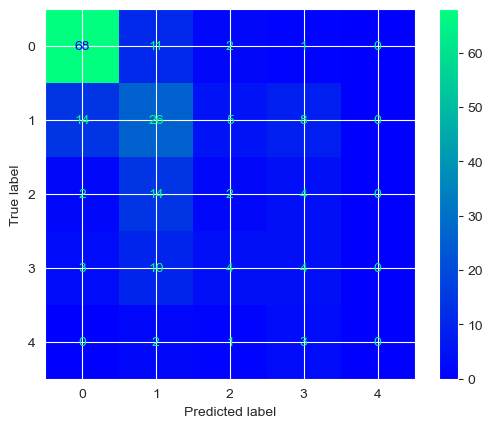

In [32]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix)
p = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
p.plot(cmap='winter')

Notwithstanding the use of **GridSearch approach**, the results show that while the performance on the training set is good, this does not hold true on the test set.

### Visualize the learning and the validation curves.
Let's check if the poor results are due to ovefitting. We can visualize the learning curve and the validation curve to quantify the bias/variance trade-off as a function of the size of the training set and the variation of the hyperparameter, for best classifier provided by the Grid Search.

In [33]:
# Function to plot the performance
def plot_performance(x_size, x_label, train_mean, train_std, test_mean, test_std):
	fig = plt.figure(figsize=(12, 7))
	ax = fig.add_subplot()

	ax.plot(x_size, train_mean, color='blue', marker='+', markersize=5, label='Training accuracy')
	ax.fill_between(x_size, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
	ax.plot(x_size, test_mean, color='green', linestyle='--', marker='d', markersize=5, label='Validation accuracy')
	ax.fill_between(x_size, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

	ax.grid()
	ax.set_xlabel(x_label)
	ax.set_ylabel('F1-score')
	ax.legend(loc='lower right')
	ax.set_ylim([0.3, 1.1])

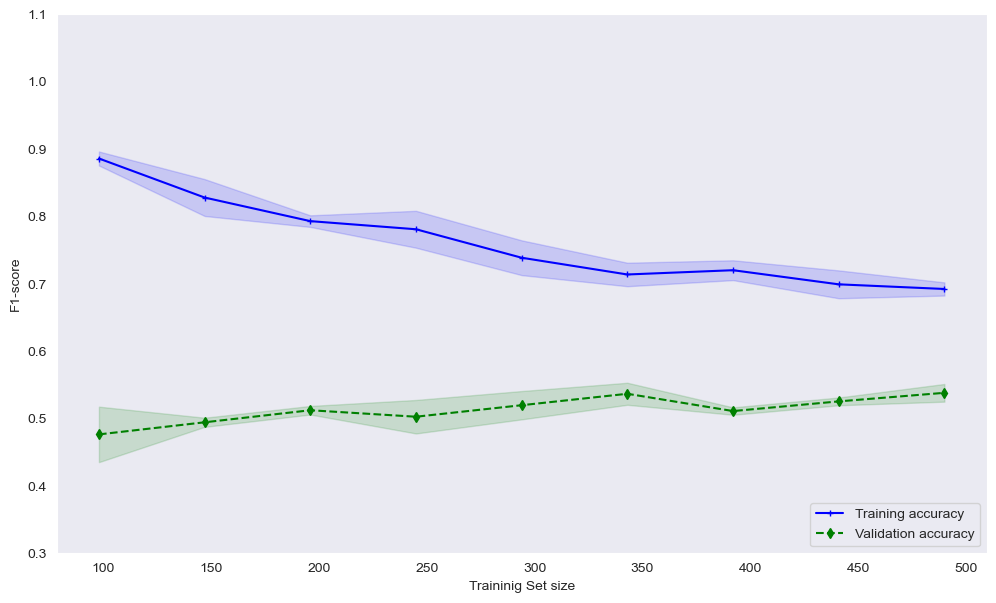

In [34]:
train_set_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_sizes, train_scores, test_scores = learning_curve(hof_gs, X=X_train, y=y_train, train_sizes=train_set_sizes, cv=3, n_jobs=-1, scoring='f1_weighted', shuffle=True)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plot_performance(train_sizes, 'Traininig Set size', train_mean, train_std, test_mean, test_std)

Let's change the numbers of estimators in order to verify the overfitting

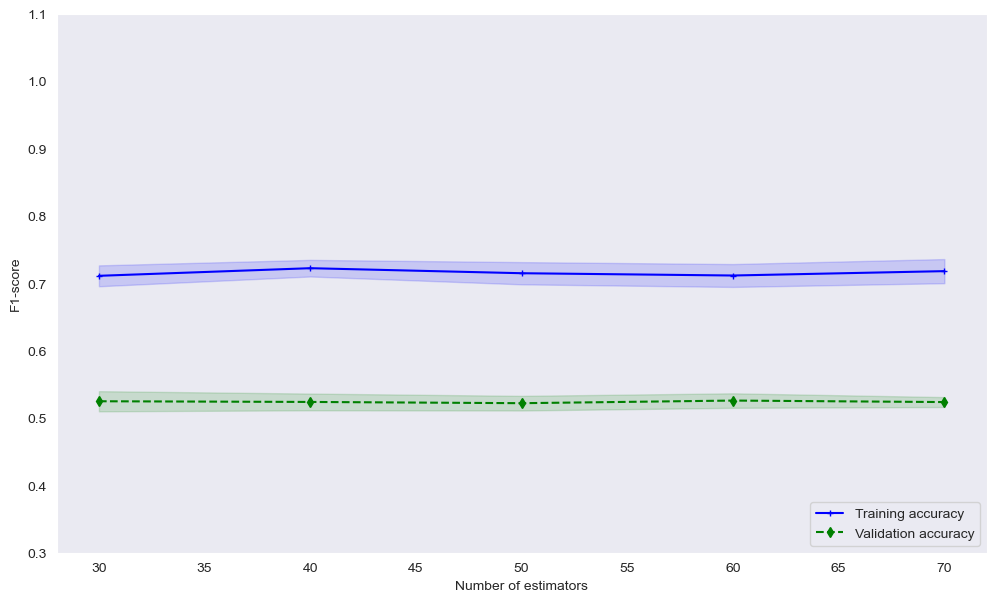

In [35]:
params_range = [30, 40, 50, 60, 70]
train_scores, test_scores = validation_curve(hof_gs, X=X_train, y=y_train, param_range=params_range, param_name='classifier__n_estimators', cv=3, n_jobs=-1, scoring='f1_weighted')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plot_performance(params_range, 'Number of estimators', train_mean, train_std, test_mean, test_std)

From both the plots we see that no overfitting occurs as a function of train set size and number of estimators.

### Refinement of the selected model

From the previous we have selected the best candidate model. In this final step, we re-run the hyperparameter optmization fixing the modelling apporach and varying the hyperparameters in a range close to selected model's one with the aim to refine the selected model. Moreover, we perform a **RepetedStratifiedKfold**.

In [36]:
params = {'classifier__n_estimators': [30, 40, 50, 60, 70]}

In [37]:
# Perform RandomizedGridSearch
rs_best = RandomizedSearchCV(
    estimator = hof_gs,
    param_distributions = params,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3),
    n_iter=20,
    scoring=f1_score_weighted,
	n_jobs=-1,
	random_state=42
)

rs_best.fit(X_train, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('drop_columns',
                                              DropFeatures(features_to_drop=['id',
                                                                             'dataset',
                                                                             'ca',
                                                                             'thal',
                                                                             'slope'])),
                                             ('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                sparse_threshold=0,
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('knnimputer',
                                                                                                KNNImputer()),
                                                                                               ('standard...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be0d43d30>)])),
                                             ('dim_reduction',
                                              LinearDiscriminantAnalysis(n_components=4)),
                                             ('classifier',
                                              RandomForestClassifier(max_depth=5,
                                                                     n_estimators=10,
                                                                     random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'classifier__n_estimators': [30, 40, 50,
                                                                     60, 70]},
                   random_state=42,
                   scoring=<function f1_score_weighted at 0x7f9bd37c75e0>)

In [38]:
# Score displacement
print(f'F1 Score on test set: {f1_score_weighted(y_test, rs_best.best_estimator_.predict(X_test))}')

F1 Score on test set: 0.5087541551659231


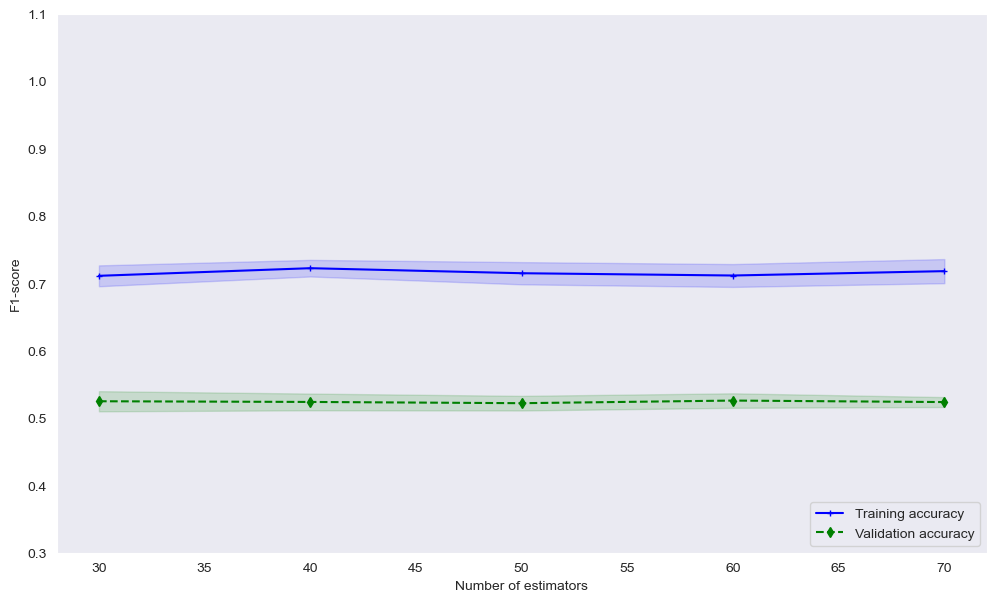

In [39]:
# Plot of the learning curve
params_range = [30, 40, 50, 60, 70]
train_scores, test_scores = validation_curve(rs_best.best_estimator_, X=X_train, y=y_train, param_range=params_range, param_name='classifier__n_estimators', cv=3, n_jobs=-1, scoring='f1_weighted')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plot_performance(params_range, 'Number of estimators', train_mean, train_std, test_mean, test_std)

From the above analysis, we can conclude that the best classifier does not exhibit overfitting and its performance does not change with the refinement. So the poor performance are mainly due to the class imbalance.

## Randomized Grid Search
Let's try to perform a RandomizedGridSearch to check if we get better results.
As in the previous case, for each classifier we define the values of the hyper-parameters to try.

In [40]:
# Define all the possible hyperparameter combinations
lr_param_rs = {
	'classifier__random_state': cl_seeds,
	'classifier__penalty': ('l2', 'l1'),
	'classifier__class_weight': ['balanced'],
	'classifier__solver': ['newton-cg'],
	'classifier__max_iter': (20, 50, 100, 200),
	'dim_reduction': [LDA(), PCA()],
	'dim_reduction__n_components': [2, 4, 6, 8]}

dt_param_rs = {
	'classifier__random_state': cl_seeds,
	'classifier__criterion': ('gini', 'entropy', 'log_loss'),
	'classifier__max_depth': (5, 10, 15, 20),
	'dim_reduction': [LDA(), PCA()],
	'dim_reduction__n_components': [2, 4, 6, 8]}

rf_param_rs = {
	'classifier__random_state': cl_seeds,
	'classifier__n_estimators': [10, 20, 50, 100],
	'classifier__max_depth': [None, 2, 5, 10],
	'dim_reduction': [LDA(), PCA()],
	'dim_reduction__n_components': [2, 4, 6, 8]}

knn_param_rs = {
	'classifier__n_neighbors': [3, 5, 7],
	'dim_reduction': [LDA(), PCA()],
	'dim_reduction__n_components': [2, 4, 6, 8]}

model_params_rs = [lr_param_rs, dt_param_rs, rf_param_rs, knn_param_rs]

In [41]:
# Perform RandomizedGridSearch
best_models_rs = []
for (model_name, model), hp in zip(model_list, model_params_rs):
	randomized = RandomizedSearchCV(model, hp, cv=3, scoring= 'f1_weighted', n_iter=20, n_jobs=-1, random_state=42)
	randomized.fit(X_train, y_train)
	print(f"Model: {model_name}")
	print(f"Best params: {randomized.best_params_}, Best score: {randomized.best_score_}")
	best_models_rs.append((model_name, randomized.best_estimator_, randomized.best_score_))
hof_model_rs = max(best_models_rs, key=lambda item:item[2])
print(f"HoF Model: {hof_model_rs}")

Model: lr
Best params: {'dim_reduction__n_components': 4, 'dim_reduction': LinearDiscriminantAnalysis(n_components=4), 'classifier__solver': 'newton-cg', 'classifier__random_state': 42, 'classifier__penalty': 'l2', 'classifier__max_iter': 50, 'classifier__class_weight': 'balanced'}, Best score: 0.5235331479886137
Model: dt
Best params: {'dim_reduction__n_components': 2, 'dim_reduction': LinearDiscriminantAnalysis(n_components=2), 'classifier__random_state': 42, 'classifier__max_depth': 5, 'classifier__criterion': 'log_loss'}, Best score: 0.5008570716907503
Model: rf
Best params: {'dim_reduction__n_components': 2, 'dim_reduction': LinearDiscriminantAnalysis(n_components=2), 'classifier__random_state': 42, 'classifier__n_estimators': 50, 'classifier__max_depth': 5}, Best score: 0.530021064587539
Model: knn
Best params: {'dim_reduction__n_components': 4, 'dim_reduction': LinearDiscriminantAnalysis(n_components=4), 'classifier__n_neighbors': 7}, Best score: 0.5117188882796765
HoF Model: ('

In [42]:
# Best model prediction and relative scores
hof_rs = hof_model_rs[1]
y_pred_train = hof_rs.predict(X_train)
y_pred_test = hof_rs.predict(X_test)
print(classification_report(y_test, y_pred_test))
f1_train = f1_score_weighted(y_train, y_pred_train)
f1_test = f1_score_weighted(y_test, y_pred_test)
print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')

              precision    recall  f1-score   support

           0       0.77      0.78      0.78        82
           1       0.42      0.58      0.49        53
           2       0.25      0.14      0.18        22
           3       0.19      0.14      0.16        21
           4       0.00      0.00      0.00         6

    accuracy                           0.55       184
   macro avg       0.33      0.33      0.32       184
weighted avg       0.52      0.55      0.53       184

F1 on training set:0.6469845300933776, F1 on test set:0.5270611121634139


[[64 13  4  1  0]
 [14 31  2  6  0]
 [ 2 14  3  3  0]
 [ 3 14  1  3  0]
 [ 0  1  2  3  0]]


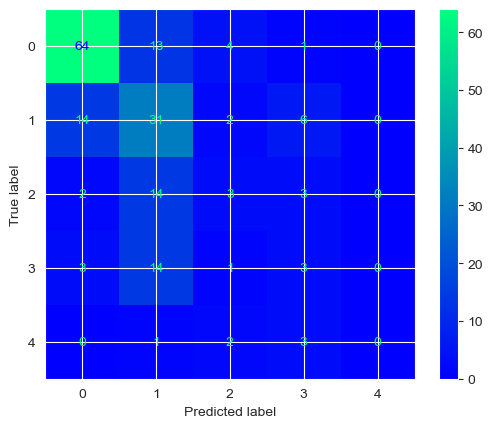

In [43]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix)
p = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
p.plot(cmap='winter')

### Visualize the learning and the validation curves for Randomized Grid Search.
Now, we can visualize the learning curve and the validation curve to quantify the bias/variance trade-off as a function of the size of the training set and the variation of the hyperparameter, for best classifier provided by the Randomized Grid Search.

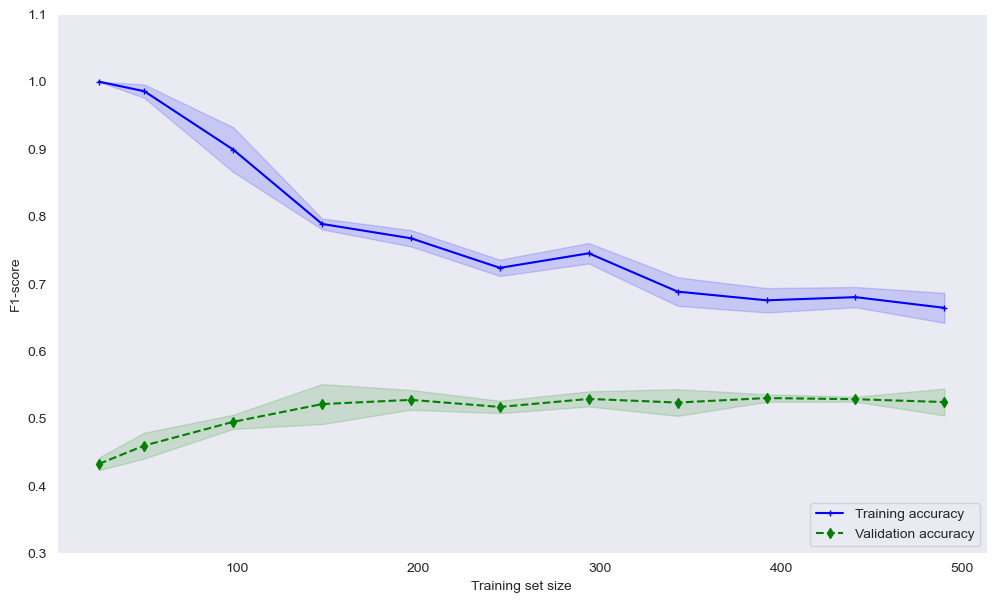

In [44]:
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(hof_rs, X=X_train, y=y_train, train_sizes=train_set_sizes, cv=3, n_jobs=-1, scoring='f1_weighted', shuffle=True)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plot_performance(train_sizes,'Training set size', train_mean, train_std, test_mean, test_std)

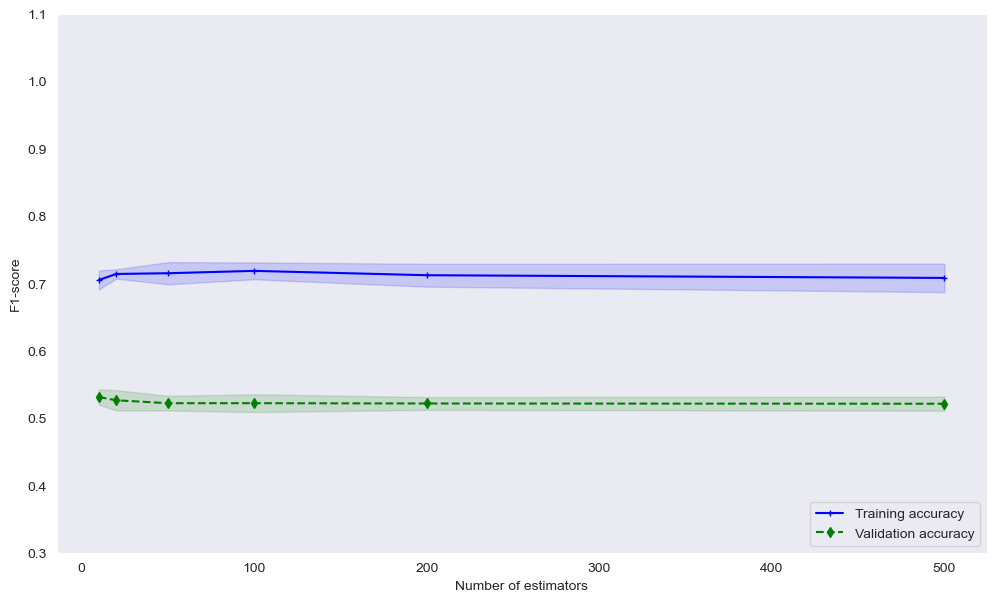

In [45]:
params_range = [10, 20, 50, 100, 200, 500]
train_scores, test_scores = validation_curve(hof_gs, X=X_train, y=y_train, param_range=params_range, param_name='classifier__n_estimators', cv=3, n_jobs=-1, scoring='f1_weighted')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plot_performance(params_range, 'Number of estimators', train_mean, train_std, test_mean, test_std)

Since the results using Grid Search and Randomized Search are quite the same, in the following we will use only the Randomized Grid Search in that when the total number of function evaluations is predefined, Grid Search will lead to a good coverage of the search space which is not worse than Randomized Search with the same budget and the difference between the two is negligible.

## Ensemble learning and relative pipeline
Let's try to use the ensemble learning techniques with the aim  to get better results.

### Bagging

In [46]:
# Bagging DecisionTree classifier
bag_dt = BaggingClassifier(
	base_estimator=DecisionTreeClassifier(),
	n_estimators=500,
	max_samples=1.0,
	max_features=1.0,
	bootstrap=True,
	n_jobs=-1,
	random_state=1
)
bag_dt

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, random_state=1)

In [47]:
# Bagging DecisionTree pipeline
bag_dt_pipeline = IMBPipeline(steps=[
	# Step 1: Drop irrelevant features
	('crop_columns', DropFeatures(features_to_drop)),
	# Step 2: Transform all the features
	('transformer', transformer),
	# Step 3: Sampling
	#('sampler', SMOTE()),
	# Step 4:  Dim reduction
	('dim_reduction', PCA()),
	# Step 5:  Bagging DecisionTree classifier
	('classifier', bag_dt)
])

bag_dt_pipeline

Pipeline(steps=[('crop_columns',
                 DropFeatures(features_to_drop=['id', 'dataset', 'ca', 'thal',
                                                'slope'])),
                ('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253c10>)])),
                ('dim_reduction', PCA()),
                ('classifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                   n_estimators=500, n_jobs=-1,
                                   random_state=1))])

In [48]:
# Bagging RandomForest classifier
bag_rf = BaggingClassifier(
	base_estimator=RandomForestClassifier(),
	n_estimators=500,
	max_samples=1.0,
	max_features=1.0,
	bootstrap=True,
	n_jobs=-1,
	random_state=1
)
bag_rf

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=500,
                  n_jobs=-1, random_state=1)

In [49]:
# Bagging RandomForest pipeline
bag_rf_pipeline = IMBPipeline(steps=[
	# Step 1: Drop irrelevant features
	('crop_columns', DropFeatures(features_to_drop)),
	# Step 2: Transform all the features
	('transformer', transformer),
	# Step 3: Sampling
	#('sampler', SMOTE()),
	# Step 4:  Dim reduction
	('dim_reduction', PCA()),
	# Step 5:  Bagging RRandomForest classifier
	('classifier',  bag_rf)
])

bag_rf_pipeline

Pipeline(steps=[('crop_columns',
                 DropFeatures(features_to_drop=['id', 'dataset', 'ca', 'thal',
                                                'slope'])),
                ('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253c10>)])),
                ('dim_reduction', PCA()),
                ('classifier',
                 BaggingClassifier(base_estimator=RandomForestClassifier(),
                                   n_estimators=500, n_jobs=-1,
                                   random_state=1))])

### AdaBoosting

In [50]:
# AdaBoost DecisionTree Classifier
ada_dt = AdaBoostClassifier(estimator = DecisionTreeClassifier(),
                          n_estimators = 500,
                          learning_rate = 0.5,
                          random_state=1)
ada_dt

AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.5,
                   n_estimators=500, random_state=1)

In [51]:
# AdaBoost DecisionTree pipeline
ada_dt_pipeline = IMBPipeline(steps=[
	# Step 1: Drop irrelevant features
	('crop_columns', DropFeatures(features_to_drop)),
	# Step 2: Transform all the features
	('transformer', transformer),
	# Step 3: Sampling
	#('sampler', SMOTE()),
	# Step 4:  Dim reduction
	('dim_reduction', PCA()),
	# Step 5:  AdaBoost DecisionTree classifier
	('classifier',  ada_dt)
])

ada_dt_pipeline

Pipeline(steps=[('crop_columns',
                 DropFeatures(features_to_drop=['id', 'dataset', 'ca', 'thal',
                                                'slope'])),
                ('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253c10>)])),
                ('dim_reduction', PCA()),
                ('classifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                                    learning_rate=0.5, n_estimators=500,
                                    random_state=1))])

In [52]:
# AdaBoost RandomForest Classifier
ada_rf = AdaBoostClassifier(estimator=RandomForestClassifier(),
							n_estimators=500,
							learning_rate=0.5,
							random_state=1)
ada_rf

AdaBoostClassifier(estimator=RandomForestClassifier(), learning_rate=0.5,
                   n_estimators=500, random_state=1)

In [53]:
# AdaBoost RandomForest pipeline
ada_rf_pipeline = IMBPipeline(steps=[
	# Step 1: Drop irrelevant features
	('crop_columns', DropFeatures(features_to_drop)),
	# Step 2: Transform all the features
	('transformer', transformer),
	# Step 3: Sampling
	#('sampler', SMOTE()),
	# Step 4:  Dim reduction
	('dim_reduction', PCA()),
	# Step 5:  AdaBoost DecisionTree classifier
	('classifier', ada_rf)
])

ada_rf_pipeline

Pipeline(steps=[('crop_columns',
                 DropFeatures(features_to_drop=['id', 'dataset', 'ca', 'thal',
                                                'slope'])),
                ('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253c10>)])),
                ('dim_reduction', PCA()),
                ('classifier',
                 AdaBoostClassifier(estimator=RandomForestClassifier(),
                                    learning_rate=0.5, n_estimators=500,
                                    random_state=1))])

### GradientBoosting

In [54]:
# Gradient boosting classifier
xgb = XGBClassifier()
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [55]:
# Gradient boosting pipeline
xgb_pipeline = IMBPipeline(steps=[
	# Step 1: Drop irrelevant features
	('crop_columns', DropFeatures(features_to_drop)),
	# Step 2: Transform all the features
	('transformer', transformer),
	# Step 3: Sampling
	#('sampler', SMOTE()),
	# Step 4:  Dim reduction
	('dim_reduction', PCA()),
	# Step 5:  Gradient boosting classifier
	('classifier', xgb)
])

xgb_pipeline


Pipeline(steps=[('crop_columns',
                 DropFeatures(features_to_drop=['id', 'dataset', 'ca', 'thal',
                                                'slope'])),
                ('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

### Randomized Grid Search for ensemble learning
Here we define all the hyper-parameters for the Randomized Grid Search with ensemble learning

In [56]:
# Define all the possible parameters combinations
bag_dt_params_grid = {
	'classifier__base_estimator__random_state': cl_seeds,
	'classifier__base_estimator__criterion': ('gini', 'entropy', 'log_loss'),
	'classifier__base_estimator__max_depth': (5, 10, 15, 20),
	'classifier__n_estimators': [200, 500, 1000],
	'dim_reduction': [LDA(), PCA()],
	'dim_reduction__n_components': [2, 4, 6, 8]}

bag_rf_params_grid = {
	'classifier__base_estimator__random_state': cl_seeds,
	'classifier__base_estimator__n_estimators': [10, 20, 50, 100],
	'classifier__base_estimator__max_depth': [None, 2, 5, 10],
	'classifier__n_estimators': [200, 500, 1000],
	'dim_reduction': [LDA(), PCA()],
	'dim_reduction__n_components': [2, 4, 6, 8]}

ada_dt_params_grid = {
	'classifier__estimator__random_state': cl_seeds,
	'classifier__estimator__criterion': ('gini', 'entropy', 'log_loss'),
	'classifier__estimator__max_depth': (5, 10, 15, 20),
	'classifier__n_estimators': [200, 500, 1000],
	'classifier__learning_rate':[0.01, 0.1, 0.5],
	'dim_reduction': [LDA(), PCA()],
	'dim_reduction__n_components': [2, 4, 6, 8]}

ada_rf_params_grid = {
	'classifier__estimator__random_state': cl_seeds,
	'classifier__estimator__n_estimators': [10, 20, 50, 100],
	'classifier__estimator__max_depth': [None, 2, 5, 10],
	'classifier__n_estimators': [200, 500, 1000],
	'classifier__learning_rate':[0.01, 0.1, 0.5],
	'dim_reduction': [LDA(), PCA()],
	'dim_reduction__n_components': [2, 4, 6, 8]}

xgb_params_grid = {
	'classifier__n_estimators': [200, 500, 1000],
	'classifier__learning_rate':[0.01, 0.1, 0.5],
	'classifier__max_depth': [1, 2, 3, 4],
	'dim_reduction': [LDA(), PCA()],
	'dim_reduction__n_components': [2, 4, 6, 8]}


ensemble_model_list = [('bag_dt', bag_dt_pipeline), ('bag_rf', bag_rf_pipeline), ('ada_dt', ada_dt_pipeline), ('ada_rf', ada_rf_pipeline), ('xgb',xgb_pipeline)]
ensemble_model_params_grid = [bag_dt_params_grid, bag_rf_params_grid, ada_dt_params_grid, ada_rf_params_grid, xgb_params_grid]

In [57]:
# Perform RandomizedGridSearch
best_ensemble_models_gs = []
for (model_name, model), hp in zip(ensemble_model_list, ensemble_model_params_grid):
	grid = RandomizedSearchCV(model, hp, cv=3, scoring='f1_weighted', n_jobs=-1, random_state=42)
	grid.fit(X_train, y_train)
	print(f"Model: {model_name}")
	print(f"Best params: {grid.best_params_}, Best score: {grid.best_score_}")
	best_ensemble_models_gs.append((model_name, grid.best_estimator_, grid.best_score_, grid.best_params_))
hof_ensemble_model_gs = max(best_ensemble_models_gs, key=lambda item: item[2])
print(f"HoF Ensemble Model: {hof_ensemble_model_gs}")

Model: bag_dt
Best params: {'dim_reduction__n_components': 4, 'dim_reduction': LinearDiscriminantAnalysis(n_components=4), 'classifier__n_estimators': 500, 'classifier__base_estimator__random_state': 42, 'classifier__base_estimator__max_depth': 5, 'classifier__base_estimator__criterion': 'gini'}, Best score: 0.5112903280638513
Model: bag_rf
Best params: {'dim_reduction__n_components': 4, 'dim_reduction': LinearDiscriminantAnalysis(n_components=4), 'classifier__n_estimators': 500, 'classifier__base_estimator__random_state': 42, 'classifier__base_estimator__n_estimators': 20, 'classifier__base_estimator__max_depth': None}, Best score: 0.5281358676488259
Model: ada_dt
Best params: {'dim_reduction__n_components': 4, 'dim_reduction': LinearDiscriminantAnalysis(n_components=4), 'classifier__n_estimators': 200, 'classifier__learning_rate': 0.5, 'classifier__estimator__random_state': 42, 'classifier__estimator__max_depth': 5, 'classifier__estimator__criterion': 'log_loss'}, Best score: 0.50092

Form Randomized Grid Search, we get that the best model is the **bag_rf**.

### Perform the prediction by using the best model, **bag_dt**, along with its best hyperparameters

In [58]:
# Best model prediction and relative scores
hof_ensemble_gs = hof_ensemble_model_gs[1]
y_pred_train = hof_ensemble_gs.predict(X_train)
y_pred_test = hof_ensemble_gs.predict(X_test)
print(classification_report(y_test, y_pred_test))
f1_train = f1_score_weighted(y_train, y_pred_train)
f1_test = f1_score_weighted(y_test, y_pred_test)
print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        82
           1       0.38      0.38      0.38        53
           2       0.19      0.14      0.16        22
           3       0.11      0.14      0.12        21
           4       0.00      0.00      0.00         6

    accuracy                           0.51       184
   macro avg       0.29      0.30      0.29       184
weighted avg       0.49      0.51      0.50       184

F1 on training set:0.9673091149689164, F1 on test set:0.498362414187643


[[68 11  2  1  0]
 [14 20  6 13  0]
 [ 3 11  3  5  0]
 [ 3 11  4  3  0]
 [ 0  0  1  5  0]]


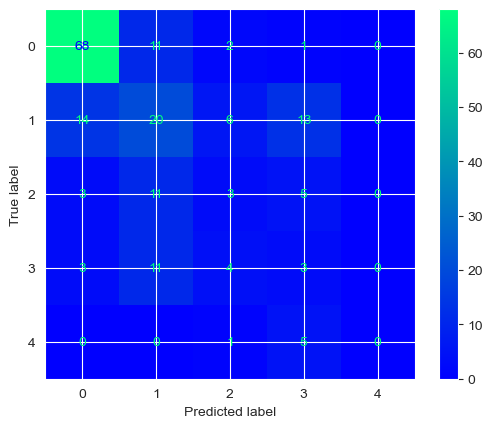

In [59]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix)
p = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
p.plot(cmap='winter')

Since we get again bad results, it is useless doing a refinement of the best model in that the reason behind such results does not depend on the specific classifier adopted.

# Dataset rearrangement

Starting from the results obtained, it is evident that the main problem behind the poor performance exhibited by all the classifiers is mainly due to the unbalancing.
As a consequence, we have to options to deal with such kind of problem:

1. upsampling the classes less represented,
2. merging classes with each disease level into a single class.


## Upsampling the data
Let's try to upsample the dataset by using the *RandomOverSampler* procedure.

In [60]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros, y_ros, test_size= 0.2, shuffle=True, stratify=y_ros, random_state=42)

np.unique(y_ros_train, return_counts=True)[1]

array([329, 329, 329, 328, 329])

### Perform again the hyper-parameters tuning by using the Randomized Grid Search on the upsampled dataset.
Randomized Grid Search with all the classifier methods defined above on upsampled data.

In [61]:
# Create unique lists with all the models defined so far and their hyper-parameters to try
all_model_list = model_list + ensemble_model_list
all_models_params_grid = model_params_grid + ensemble_model_params_grid

In [62]:
# Perform Randomized Grid Search
best_models_gs = []
for (model_name, model), hp in zip(all_model_list, all_models_params_grid):
	grid = RandomizedSearchCV(model, hp, cv=3, scoring='f1_weighted', n_jobs=-1, random_state=42)
	grid.fit(X_ros_train, y_ros_train)
	print(f"Model: {model_name}")
	print(f"Best params: {grid.best_params_}, Best score: {grid.best_score_}")
	best_models_gs.append((model_name, grid.best_estimator_, grid.best_score_, grid.best_params_))
hof_model_gs = max(best_models_gs, key=lambda item:item[2])
print(f"HoF Model: {hof_model_gs}")

Model: lr
Best params: {'dim_reduction__n_components': 2, 'dim_reduction': LinearDiscriminantAnalysis(n_components=2), 'classifier__solver': 'newton-cg', 'classifier__random_state': 42, 'classifier__penalty': 'l2', 'classifier__max_iter': 20, 'classifier__class_weight': 'balanced'}, Best score: 0.4006677575853778
Model: dt
Best params: {'dim_reduction__n_components': 2, 'dim_reduction': LinearDiscriminantAnalysis(n_components=2), 'classifier__random_state': 42, 'classifier__max_depth': 15, 'classifier__criterion': 'log_loss'}, Best score: 0.7981642614566642
Model: rf
Best params: {'dim_reduction__n_components': 8, 'dim_reduction': PCA(n_components=8), 'classifier__random_state': 42, 'classifier__n_estimators': 100, 'classifier__max_depth': None}, Best score: 0.8329571176425689
Model: knn
Best params: {'dim_reduction__n_components': 4, 'dim_reduction': LinearDiscriminantAnalysis(n_components=4), 'classifier__n_neighbors': 3}, Best score: 0.7262819711125941
Model: bag_dt
Best params: {'d

From Randomized Grid Search, we got that the best classifier is the **ada_rf** and the performance are greatly improved.

### Evaluate the performance of the best classifier
We compute the classification report and display the confusion matrix of the best model.

In [63]:
# Best model predictions and relative scores
hof_gs = hof_model_gs[1]
y_pred_train = hof_gs.predict(X_ros_train)
y_pred_test = hof_gs.predict(X_ros_test)
print(classification_report(y_ros_test, y_pred_test))
f1_train = f1_score_weighted(y_ros_train, y_pred_train)
f1_test = f1_score_weighted(y_ros_test, y_pred_test)
print(f'F1 score on training set:{f1_train}, F1 score on test set:{f1_test}')

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        82
           1       0.74      0.77      0.75        82
           2       0.94      0.99      0.96        82
           3       0.93      0.98      0.95        83
           4       0.99      1.00      0.99        82

    accuracy                           0.89       411
   macro avg       0.89      0.89      0.89       411
weighted avg       0.89      0.89      0.89       411

F1 score on training set:0.9757206108560948, F1 score on test set:0.8859264899342886


[[58 19  3  2  0]
 [12 63  2  4  1]
 [ 0  1 81  0  0]
 [ 0  2  0 81  0]
 [ 0  0  0  0 82]]


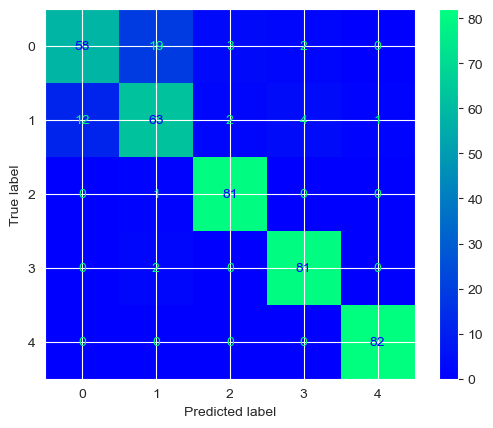

In [64]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_ros_test, y_pred_test)
print(conf_matrix)
p = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
p.plot(cmap='winter')

From the results, we see that the performace is greatly improved. Anyway, the confusion matrix and the classification report show that the improvement of the performacne is mainly on the last 3 classes amd specually on the last one. This behaviour can be reported to the upsampling procedure, In fact, while the performance on the first 2 classes does not change greatly from the case of the original dataset, the performance on the last 3 classes has improved dramatically.

### Visualize the learning and the validation curves for best classifier provided by the Randomized Grid Search.
Now, we can visualize the learning curve and the validation curve to quantify the bias/variance trade-off as a function of the size of the training set and the variation of the hyperparameter, for best classifier provided by the Randomized Grid Search.

In [65]:
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(hof_gs, X=X_ros_train, y=y_ros_train, train_sizes=train_set_sizes, cv=3, n_jobs=-1, scoring='f1_weighted', shuffle=True)

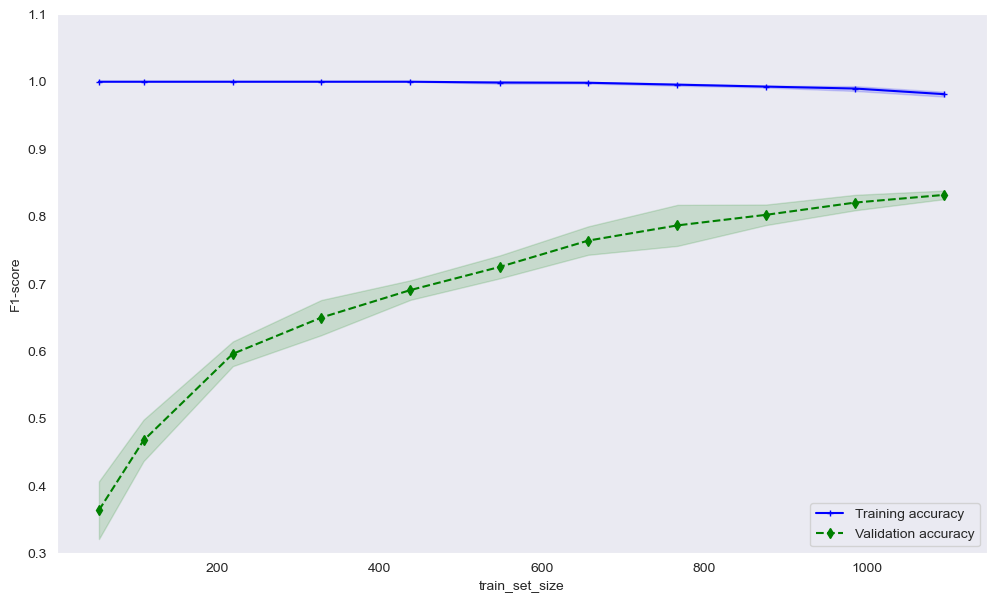

In [66]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plot_performance(train_sizes, 'train_set_size', train_mean, train_std, test_mean, test_std)

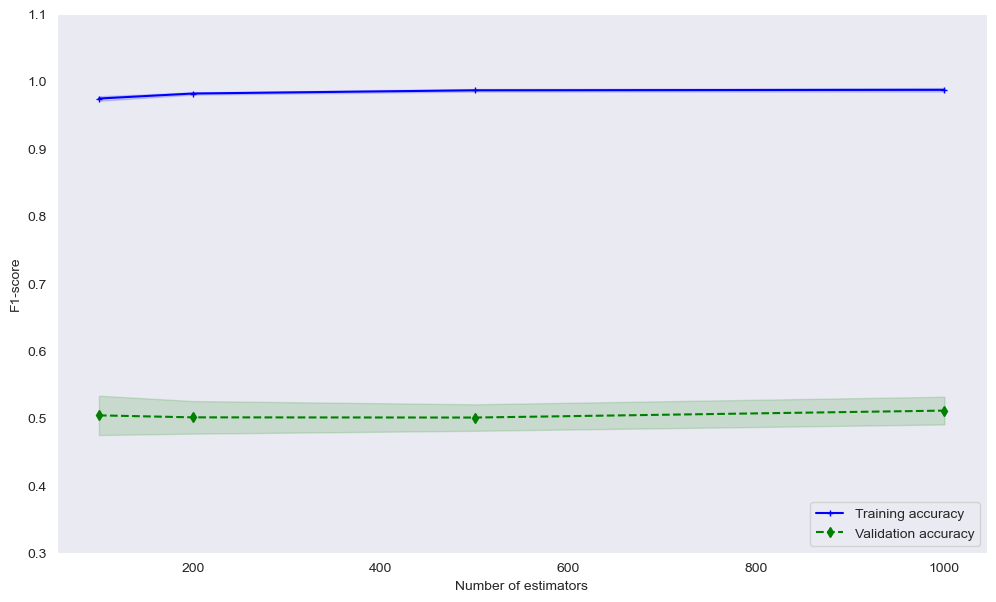

In [67]:
params_range = [100, 200, 500, 1000]
train_scores, test_scores = validation_curve(hof_gs, X=X_train, y=y_train, param_range=params_range, param_name='classifier__n_estimators', cv=3, n_jobs=-1, scoring='f1_weighted')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plot_performance(params_range, 'Number of estimators', train_mean, train_std, test_mean, test_std)

From the plots above, we can conclude that no overfitting occurs as as function of the train set size and the number of estimators.

### Perform again the Cross Validation for the best model found so far

Average score: 0.843065693430657 +/- 0.01042970085126659, Max score: 0.8576642335766423, Min score: 0.833941605839416
F1 on test set: 0.8413970670981813
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        82
           1       0.73      0.62      0.67        82
           2       0.81      0.93      0.86        82
           3       0.94      0.93      0.93        83
           4       0.99      1.00      0.99        82

    accuracy                           0.84       411
   macro avg       0.84      0.84      0.84       411
weighted avg       0.84      0.84      0.84       411

[[61 13  8  0  0]
 [20 51  8  2  1]
 [ 0  3 76  3  0]
 [ 1  3  2 77  0]
 [ 0  0  0  0 82]]


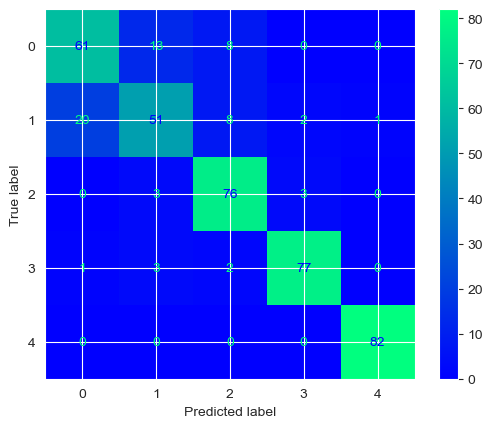

In [68]:
# Applying the cross validation, display the scores and the confusion matrix
scores = cross_validate(hof_gs, X_ros_train, y_ros_train, cv=3, return_estimator=True, n_jobs=-1)
print(f"Average score: {scores['test_score'].mean()} +/- {scores['test_score'].std()}, Max score: {scores['test_score'].max()}, Min score: {scores['test_score'].min()}")

# evaluate the best classifier on the test set
best_score_id = np.argmax(scores['test_score'])
y_test_predicted = scores['estimator'][best_score_id].predict(X_ros_test)
f1_test = f1_score_weighted(y_ros_test, y_test_predicted)
print(f'F1 on test set: {f1_test}')
conf_matrix = confusion_matrix(y_ros_test, y_test_predicted)
print(classification_report(y_ros_test, y_test_predicted))
print(conf_matrix)
p = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
p.plot(cmap='winter')

The results coming form the re-run of the cross-validation of the best classifier show that we does not get any improvement with respect to the **ada_rf** trained with the Randomized Grid Search. This results, is due to the fact that by re-running the cross-val we hide a piece of information of the train set, while after the RGS we perform the training on the whole training set.

### Building a Voting Classifier from best model of each architecture

The last attempt to get better results consists in building a voting classifier. To do this, we take into account the best classifiers previously trained with the exception of the Logistic Regression which exhibited poor performances.

In [69]:
# Define a Voting classifiers for GridSearch
best_models_gs = best_models_gs[1:]
voting_model_gs = VotingClassifier(estimators=[(x[0], x[1]) for x in best_models_gs], voting='hard', weights=[x[2] for x in best_models_gs])
voting_model_gs

VotingClassifier(estimators=[('dt',
                              Pipeline(steps=[('drop_columns',
                                               DropFeatures(features_to_drop=['id',
                                                                              'dataset',
                                                                              'ca',
                                                                              'thal',
                                                                              'slope'])),
                                              ('transformer',
                                               ColumnTransformer(remainder='passthrough',
                                                                 sparse_threshold=0,
                                                                 transformers=[('num',
                                                                                Pipeline(steps=[('knnimputer',
                                                                                                 KNNImputer()),
                                                                                                ('standardscaler',
                                                                                                 StandardScaler())]),
                                                                                <sklearn.compose._column_transforme...
                                                             max_delta_step=0,
                                                             max_depth=3,
                                                             max_leaves=0,
                                                             min_child_weight=1,
                                                             missing=nan,
                                                             monotone_constraints='()',
                                                             n_estimators=1000,
                                                             n_jobs=0,
                                                             num_parallel_tree=1,
                                                             objective='multi:softprob',
                                                             predictor='auto', ...))]))],
                 weights=[0.7981642614566642, 0.8329571176425689,
                          0.7262819711125941, 0.8108135511655313,
                          0.8196711566312901, 0.8407677648654991,
                          0.8329366371698245, 0.80381324733691])

F1 on test set: 0.9010495759326148
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        82
           1       0.79      0.80      0.80        82
           2       0.94      0.98      0.96        82
           3       0.93      0.98      0.95        83
           4       0.98      1.00      0.99        82

    accuracy                           0.90       411
   macro avg       0.90      0.90      0.90       411
weighted avg       0.90      0.90      0.90       411

[[62 16  3  1  0]
 [ 9 66  2  3  2]
 [ 0  0 80  2  0]
 [ 0  2  0 81  0]
 [ 0  0  0  0 82]]


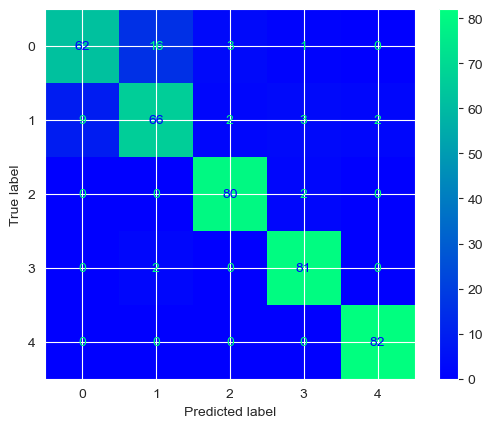

In [70]:
# Perform teh fitting on the whole train set
y_train_predicted = voting_model_gs.fit(X_ros_train, y_ros_train)
y_test_predicted = voting_model_gs.predict(X_ros_test)
f1_test = f1_score_weighted(y_ros_test, y_test_predicted)
print(f'F1 on test set: {f1_test}')
conf_matrix = confusion_matrix(y_ros_test, y_test_predicted)
print(classification_report(y_ros_test, y_test_predicted))
print(conf_matrix)
p = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
p.plot(cmap='winter')

Average score: 0.847323600973236 +/- 0.0060215905940460305, Max score: 0.8558394160583942, Min score: 0.843065693430657
F1 on test set: 0.8607778122379437
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        82
           1       0.81      0.68      0.74        82
           2       0.85      0.94      0.89        82
           3       0.85      0.93      0.89        83
           4       0.95      0.98      0.96        82

    accuracy                           0.86       411
   macro avg       0.86      0.86      0.86       411
weighted avg       0.86      0.86      0.86       411

[[65 10  3  2  2]
 [11 56  8  6  1]
 [ 0  1 77  4  0]
 [ 0  2  3 77  1]
 [ 0  0  0  2 80]]


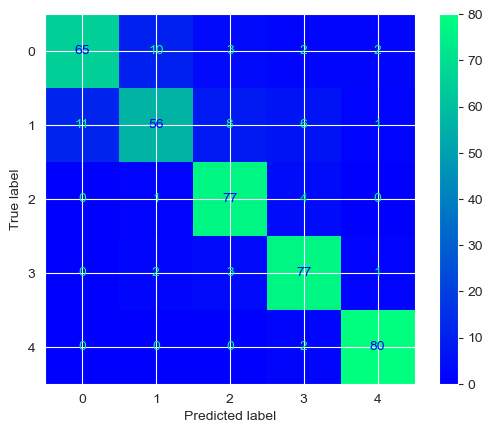

In [71]:
# Applying the cross validation and display the scores
scores = cross_validate(voting_model_gs, X_ros_train, y_ros_train, cv=3, return_estimator=True, n_jobs=-1)
print(f"Average score: {scores['test_score'].mean()} +/- {scores['test_score'].std()}, Max score: {scores['test_score'].max()}, Min score: {scores['test_score'].min()}")

# evaluate the  best classifier on the test set
best_score_id = np.argmax(scores['test_score'])
y_test_predicted = scores['estimator'][best_score_id].predict(X_ros_test)
f1_test = f1_score_weighted(y_ros_test, y_test_predicted)
print(f'F1 on test set: {f1_test}')
conf_matrix = confusion_matrix(y_ros_test, y_test_predicted)
print(classification_report(y_ros_test, y_test_predicted))
print(conf_matrix)
p = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
p.plot(cmap='winter')

The results exhibited by the Voting Classifier show that the performance is a little bit better than **ada_rf**.

## Merging classes with each disease level into a single class

By Merging classes with each disease stage into a single class, we reduce the task to a binary classification.

1    509
0    411
Name: target, dtype: int64


<AxesSubplot: xlabel='target', ylabel='count'>

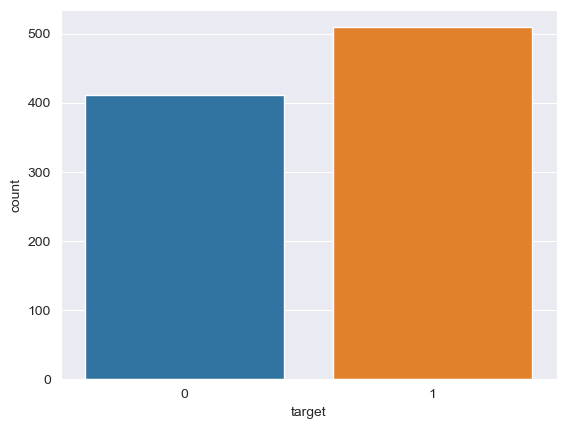

In [72]:
# Merge classes with each disease stage into a single class
heart_dataset['target'] = heart_dataset['target'].apply(lambda x: 1 if (x > 1 & x <= 4) else x)
print(heart_dataset.target.value_counts())
sns.countplot(x=heart_dataset['target'])

In [73]:
# Separate the classes form the features
y = heart_dataset['target']
X = heart_dataset.drop('target', axis=1)

### Upsample the data
Given that, also after merging the classes, we have a data set a little bit imbalanced, we perform the data upsampling.

In [74]:
# Upsampling the data
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros, y_ros, test_size= 0.2, shuffle=True, stratify=y_ros, random_state=42)
np.unique(y_ros_train, return_counts=True)[1]

array([407, 407])

### Let's us introduce the perceptron classifier
Given that, now, we deal with a binary classification, we can introduce the perceptron classifier, the bagging and the boosting with perceptron.

In [75]:
# Perceptron pipeline
perceptron_pipeline = IMBPipeline([
	# Step 1: Drop irrelevant features
	('drop_columns', DropFeatures(features_to_drop)),
	# Step 2: Impute and scale columns/features
	('transformer', transformer),
	# Step 3: Sampling
	#('sampler', SMOTE()),
	# Step 4:  Dim reduction
	('dim_reduction', PCA()),
	# Step 5:  Decision Tree Classifier
	('classifier', Perceptron())
])

perceptron_pipeline

Pipeline(steps=[('drop_columns',
                 DropFeatures(features_to_drop=['id', 'dataset', 'ca', 'thal',
                                                'slope'])),
                ('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253cd0>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253c10>)])),
                ('dim_reduction', PCA()), ('classifier', Perceptron())])

In [76]:
# Bagging Perceptron classifier
bag_perceptron = BaggingClassifier(
	base_estimator=Perceptron(),
	n_estimators=500,
	max_samples=1.0,
	max_features=1.0,
	bootstrap=True,
	n_jobs=-1,
	random_state=1
)

bag_perceptron

BaggingClassifier(base_estimator=Perceptron(), n_estimators=500, n_jobs=-1,
                  random_state=1)

In [77]:
# Bagging Perceptron pipeline
bag_perceptron_pipeline = IMBPipeline([
	# Step 1: Drop irrelevant features
	('drop_columns', DropFeatures(features_to_drop)),
	# Step 2: Impute and scale columns/features
	('transformer', transformer),
	# Step 3: Sampling
	#('sampler', SMOTE()),
	# Step 4:  Dim reduction
	('dim_reduction', PCA()),
	# Step 5:  Decision Tree Classifier
	('classifier', bag_perceptron)
])

bag_perceptron_pipeline

Pipeline(steps=[('drop_columns',
                 DropFeatures(features_to_drop=['id', 'dataset', 'ca', 'thal',
                                                'slope'])),
                ('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253c10>)])),
                ('dim_reduction', PCA()),
                ('classifier',
                 BaggingClassifier(base_estimator=Perceptron(),
                                   n_estimators=500, n_jobs=-1,
                                   random_state=1))])

In [78]:
# AdaBoost Perceptron Classifier
ada_perceptron = AdaBoostClassifier(algorithm='SAMME',
							base_estimator=Perceptron(),
							n_estimators=500,
							learning_rate=0.5,
							random_state=1)
ada_perceptron

AdaBoostClassifier(algorithm='SAMME', base_estimator=Perceptron(),
                   learning_rate=0.5, n_estimators=500, random_state=1)

In [79]:
# AdaBoost Perceptron pipeline
ada_perceptron_pipeline = IMBPipeline([
	# Step 1: Drop irrelevant features
	('drop_columns', DropFeatures(features_to_drop)),
	# Step 2: Impute and scale columns/features
	('transformer', transformer),
	# Step 3: Sampling
	#('sampler', SMOTE()),
	# Step 4:  Dim reduction
	('dim_reduction', PCA()),
	# Step 5:  Decision Tree Classifier
	('classifier', ada_perceptron)
])

ada_perceptron_pipeline

Pipeline(steps=[('drop_columns',
                 DropFeatures(features_to_drop=['id', 'dataset', 'ca', 'thal',
                                                'slope'])),
                ('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9be1253c10>)])),
                ('dim_reduction', PCA()),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME',
                                    base_estimator=Perceptron(),
                                    learning_rate=0.5, n_estimators=500,
                                    random_state=1))])

In [80]:
# Define all the possible params combinations
perceptron_param_grid = {
	'classifier__random_state': cl_seeds,
	'classifier__eta0' : [0.001, 0.01, 0.1, 1, 10, 100],
	'classifier__max_iter': [10, 20, 30, 40, 50, 100],
	'classifier__class_weight' : [None, 'balanced'],
	'dim_reduction': [LDA(), PCA()],
	'dim_reduction__n_components': [2, 4, 6, 8]}

bag_perceptron_params_grid = {
	'classifier__base_estimator__random_state': cl_seeds,
	'classifier__base_estimator__eta0' : [0.001, 0.01, 0.1, 1, 10, 100],
	'classifier__base_estimator__max_iter': [10, 20, 30, 40, 50, 100],
	'classifier__base_estimator__class_weight' : [None, 'balanced'],
	'classifier__n_estimators': [200, 500, 1000],
	'dim_reduction': [LDA(), PCA()],
	'dim_reduction__n_components': [2, 4, 6, 8]}

ada_perceptron_params_grid = {
	'classifier__base_estimator__random_state': cl_seeds,
	'classifier__base_estimator__eta0' : [0.001, 0.01, 0.1, 1, 10, 100],
	'classifier__base_estimator__max_iter': [10, 20, 30, 40, 50, 100],
	'classifier__base_estimator__class_weight' : [None, 'balanced'],
	'classifier__n_estimators': [200, 500, 1000],
	'classifier__learning_rate':[0.01, 0.1, 0.5],
	'dim_reduction': [LDA(), PCA()],
	'dim_reduction__n_components': [2, 4, 6, 8]}

Update the lists of classifiers and hyper-parameters.

In [81]:
# Update the list of classifiers and hyper-parameters
all_model_list = model_list + ensemble_model_list
all_models_params_grid = model_params_grid + ensemble_model_params_grid

all_model_list.append(('perceptron', perceptron_pipeline))
all_model_list.append(('ada_perceptron', ada_perceptron_pipeline))
all_model_list.append(('bag_perceptron', bag_perceptron_pipeline))
all_models_params_grid.append(perceptron_param_grid)
all_models_params_grid.append(ada_perceptron_params_grid)
all_models_params_grid.append(bag_perceptron_params_grid)

###  Randomized Grid Search
Apply Randomized grid search.

In [82]:
# Perform RandomizedGridSearch
best_models_gs = []
for (model_name, model), hp in zip(all_model_list, all_models_params_grid):
	grid = RandomizedSearchCV(model, hp, cv=3, scoring='f1_weighted', n_jobs=-1, random_state=42)
	grid.fit(X_ros_train, y_ros_train)
	print(f"Model: {model_name}")
	print(f"Best params: {grid.best_params_}, Best score: {grid.best_score_}")
	best_models_gs.append((model_name, grid.best_estimator_, grid.best_score_))
hof_model_gs = max(best_models_gs, key=lambda item:item[2])
print(f"HoF Model: {hof_model_gs}")

Model: lr
Best params: {'dim_reduction__n_components': 4, 'dim_reduction': PCA(n_components=4), 'classifier__solver': 'newton-cg', 'classifier__random_state': 42, 'classifier__penalty': 'l2', 'classifier__max_iter': 20, 'classifier__class_weight': 'balanced'}, Best score: 0.7591461850231559
Model: dt
Best params: {'dim_reduction__n_components': 4, 'dim_reduction': PCA(n_components=4), 'classifier__random_state': 42, 'classifier__max_depth': 5, 'classifier__criterion': 'log_loss'}, Best score: 0.7465859709643455
Model: rf
Best params: {'dim_reduction__n_components': 8, 'dim_reduction': PCA(n_components=8), 'classifier__random_state': 42, 'classifier__n_estimators': 100, 'classifier__max_depth': None}, Best score: 0.8156778833116515
Model: knn
Best params: {'dim_reduction__n_components': 4, 'dim_reduction': PCA(n_components=4), 'classifier__n_neighbors': 7}, Best score: 0.7737411808642918
Model: bag_dt
Best params: {'dim_reduction__n_components': 6, 'dim_reduction': PCA(n_components=6), 

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       102
           1       0.80      0.72      0.76       102

    accuracy                           0.77       204
   macro avg       0.77      0.77      0.77       204
weighted avg       0.77      0.77      0.77       204

F1 score on training set:0.9582309582309584, F1 score on test set:0.7689360163875167
[[84 18]
 [29 73]]


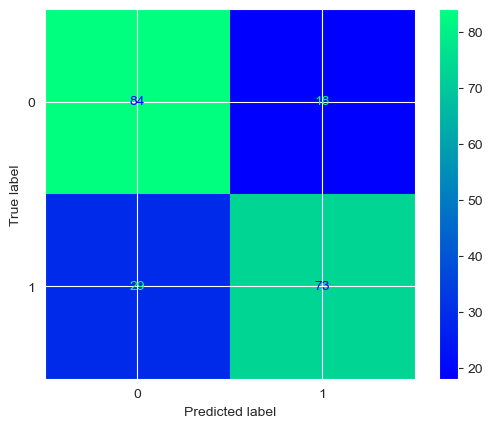

In [83]:
# Best model predictions and relative scores
hof_gs = hof_model_gs[1]
y_pred_train = hof_gs.predict(X_ros_train)
y_pred_test = hof_gs.predict(X_ros_test)
print(classification_report(y_ros_test, y_pred_test))
f1_train = f1_score_weighted(y_ros_train, y_pred_train)
f1_test = f1_score_weighted(y_ros_test, y_pred_test)
print(f'F1 score on training set:{f1_train}, F1 score on test set:{f1_test}')
conf_matrix = confusion_matrix(y_ros_test, y_pred_test)
print(conf_matrix)
p = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
p.plot(cmap='winter')

In this case the best model is **ada_rf**.

### Visualize the learning and the validation curves for Randomized Grid Search.
Now, we visualize the learning curve and the validation curve to quantify the bias/variance trade-off as a function of the size of the training set and the variation of the hyperparameter, for best classifier provided by the Randomized Grid Search.

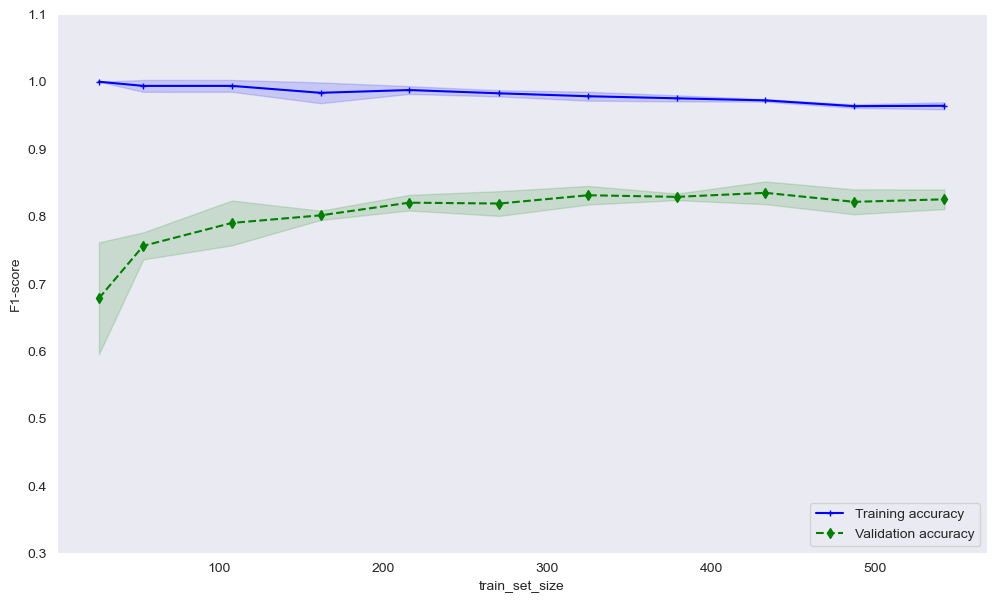

In [84]:
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(hof_gs, X=X_ros_train, y=y_ros_train, train_sizes=train_set_sizes, cv=3, n_jobs=-1,scoring='f1_weighted', shuffle=True)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plot_performance(train_sizes, 'train_set_size', train_mean, train_std, test_mean, test_std)

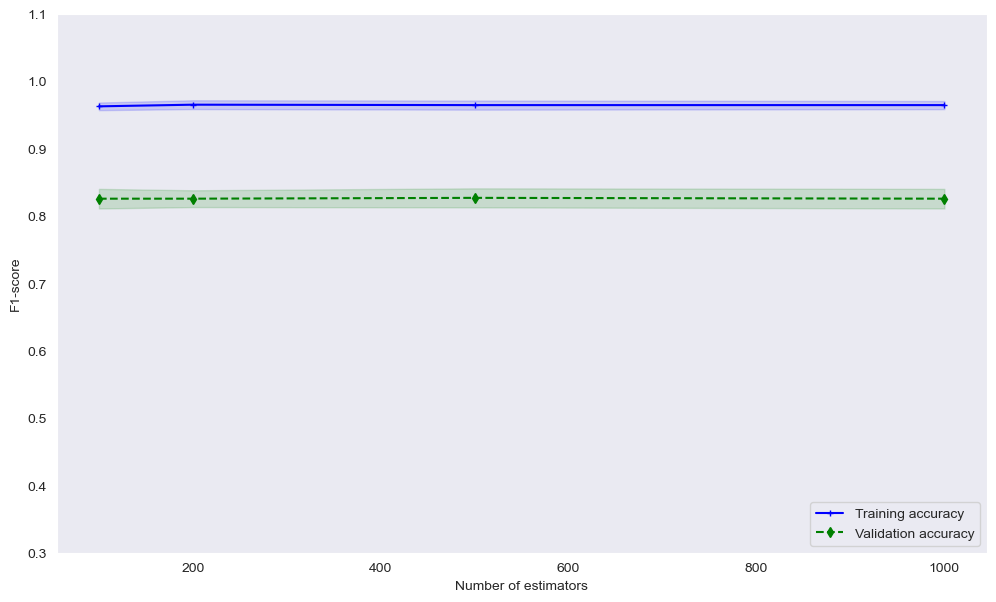

In [85]:
params_range = [100, 200, 500, 1000]

train_scores, test_scores = validation_curve(hof_gs, X=X_ros_train, y=y_ros_train, param_range=params_range, param_name='classifier__n_estimators', cv=3, n_jobs=-1, scoring='f1_weighted')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plot_performance(params_range, 'Number of estimators', train_mean, train_std, test_mean, test_std)

### Perform again the Cross Validation for the best nodel found so far.

Average score: 0.8267581940525287 +/- 0.014060931159389714, Max score: 0.8455882352941176, Min score: 0.8118081180811808
F1 on test set: 0.7646153846153845
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       102
           1       0.78      0.75      0.76       102

    accuracy                           0.76       204
   macro avg       0.77      0.76      0.76       204
weighted avg       0.77      0.76      0.76       204

[[80 22]
 [26 76]]


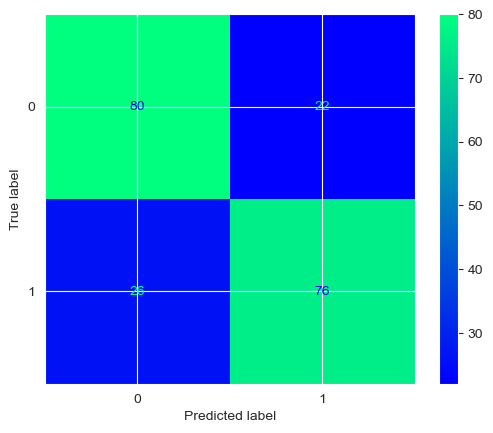

In [86]:
scores = cross_validate(hof_gs, X_ros_train, y_ros_train, cv=3, return_estimator=True, n_jobs=-1)
print(f"Average score: {scores['test_score'].mean()} +/- {scores['test_score'].std()}, Max score: {scores['test_score'].max()}, Min score: {scores['test_score'].min()}")

# evaluate the  best classifier on the test set
best_score_id = np.argmax(scores['test_score'])
y_test_predicted = scores['estimator'][best_score_id].predict(X_ros_test)
f1_test = f1_score_weighted(y_ros_test, y_test_predicted)
print(f'F1 on test set: {f1_test}')
conf_matrix = confusion_matrix(y_ros_test, y_test_predicted)
print(classification_report(y_ros_test, y_test_predicted))
print(conf_matrix)
p = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
p.plot(cmap='winter')

As it is evident, the results are worse than the previous case.

### Building a Voting Classifier from best model of each architecture

To build the voting classifier, we take into account the best classifiers previously trained

In [87]:
# Define a voting classifier
voting_model = VotingClassifier(estimators=[(x[0], x[1]) for x in best_models_gs], voting='hard', weights=[x[2] for x in best_models_gs])
voting_model

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('drop_columns',
                                               DropFeatures(features_to_drop=['id',
                                                                              'dataset',
                                                                              'ca',
                                                                              'thal',
                                                                              'slope'])),
                                              ('transformer',
                                               ColumnTransformer(remainder='passthrough',
                                                                 sparse_threshold=0,
                                                                 transformers=[('num',
                                                                                Pipeline(steps=[('knnimputer',
                                                                                                 KNNImputer()),
                                                                                                ('standardscaler',
                                                                                                 StandardScaler())]),
                                                                                <sklearn.compose._column_transforme...
                                               BaggingClassifier(base_estimator=Perceptron(class_weight='balanced',
                                                                                           eta0=0.01,
                                                                                           max_iter=40,
                                                                                           random_state=42),
                                                                 n_estimators=500,
                                                                 n_jobs=-1,
                                                                 random_state=1))]))],
                 weights=[0.7591461850231559, 0.7465859709643455,
                          0.8156778833116515, 0.7737411808642918,
                          0.7933328375200164, 0.8267087113125035,
                          0.7663638348654374, 0.8156774863044595,
                          0.786101656667724, 0.7202654443950479,
                          0.7848843928406137, 0.8032748878828255])

In [88]:
# Evaluate the voting model
voting_model = voting_model.fit(X_ros_train, y_ros_train)
y_train_predicted = voting_model.predict(X_ros_train)
y_test_predicted = voting_model.predict(X_ros_test)
f1_train = f1_score(y_ros_train, y_train_predicted)
f1_test = f1_score(y_ros_test, y_test_predicted)

              precision    recall  f1-score   support

           0       0.74      0.81      0.78       102
           1       0.79      0.72      0.75       102

    accuracy                           0.76       204
   macro avg       0.77      0.76      0.76       204
weighted avg       0.77      0.76      0.76       204

F1 on training set:0.9232673267326733, F1 on test set:0.7525773195876289
[[83 19]
 [29 73]]


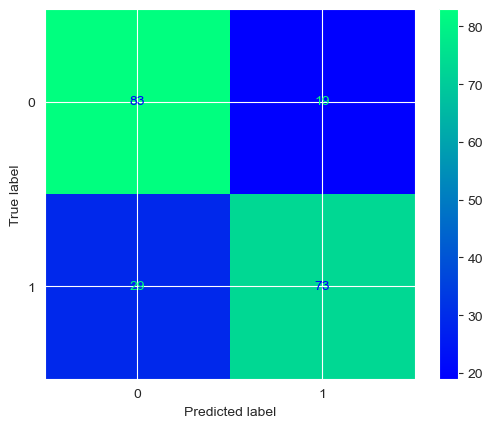

In [89]:
# Display classification report and the confusion matrix
print(classification_report(y_ros_test, y_test_predicted))
print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')
conf_matrix = confusion_matrix(y_ros_test, y_test_predicted)
print(conf_matrix)
p = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
p.plot(cmap='winter')

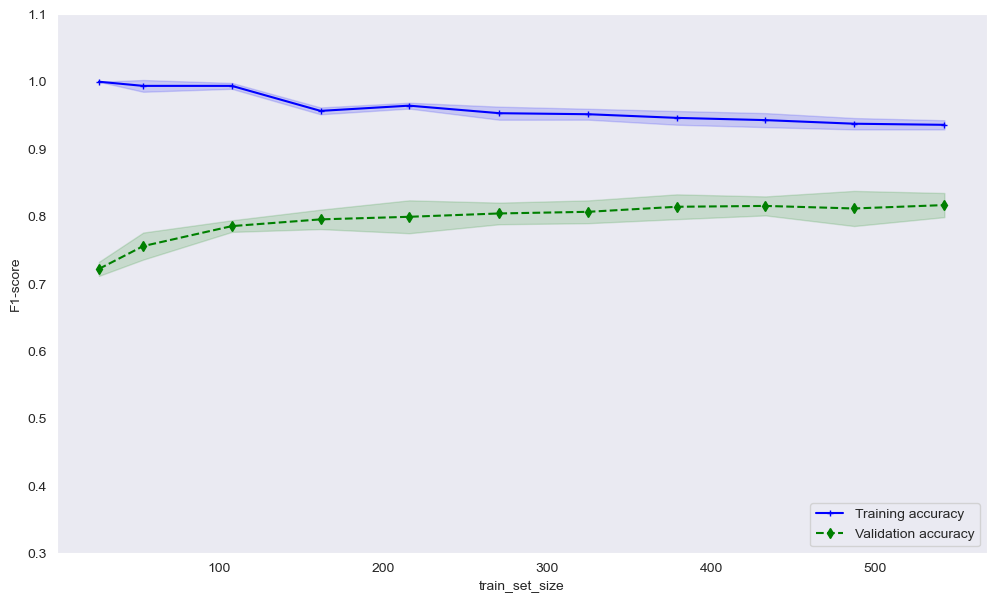

In [90]:
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(voting_model, X=X_ros_train, y=y_ros_train, train_sizes=train_set_sizes, cv=3, n_jobs=-1,scoring='f1_weighted', shuffle=True)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plot_performance(train_sizes, 'train_set_size', train_mean, train_std, test_mean, test_std)

### Perform again the Cross Validation

Average score: 0.815697127559511 +/- 0.016219187940580342, Max score: 0.8382352941176471, Min score: 0.8007380073800738
F1 on test set: 0.7596595417277777
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       102
           1       0.77      0.74      0.75       102

    accuracy                           0.76       204
   macro avg       0.76      0.76      0.76       204
weighted avg       0.76      0.76      0.76       204

[[80 22]
 [27 75]]


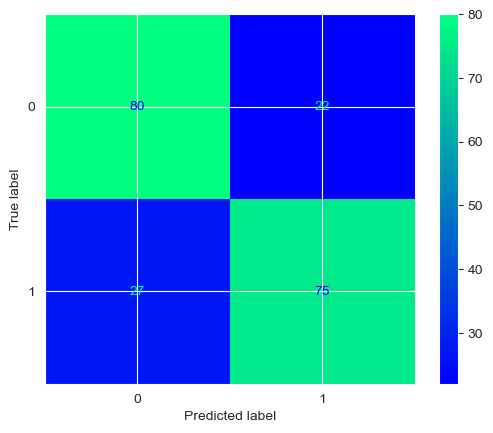

In [91]:
scores = cross_validate(voting_model, X_ros_train, y_ros_train, cv=3, return_estimator=True, n_jobs=-1)
print(f"Average score: {scores['test_score'].mean()} +/- {scores['test_score'].std()}, Max score: {scores['test_score'].max()}, Min score: {scores['test_score'].min()}")

# evaluate the  best classifier on the test set
best_score_id = np.argmax(scores['test_score'])
y_test_predicted = scores['estimator'][best_score_id].predict(X_ros_test)
f1_test = f1_score_weighted(y_ros_test, y_test_predicted)
print(f'F1 on test set: {f1_test}')
conf_matrix = confusion_matrix(y_ros_test, y_test_predicted)
print(classification_report(y_ros_test, y_test_predicted))
print(conf_matrix)
p = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
p.plot(cmap='winter')

# Conclusion

In the end, after all the above attempts we can conclude that the best model is the *ada_rf* in all the attempts, and the winner is *ada_rf*  with all the classes.
From the results it is evident that the strong imbalance of the dataset greatly affects the performance of all the classifiers considered.
We have considered to use the SMOTE procedure, but preliminary results (not shown here) have shown that the performance does not change.

On the other hand, when we upsample the data with the RandomOverSampler procedure, while the performance greatly improve, the gain is related mainly to the last 3 classes, thus introducing a bias. Finally, it should be noted that the best performance is shown by the ensemble learning approach and the winner is the adaptive boosting approach with the Random Forest estimator.